# Tennis Upset Prediction - Data Modeling

This notebook prepares the featured data for classification modeling by:
1. Loading and combining all featured datasets
2. Checking feature correlations
3. Removing highly correlated features
4. Standardizing features for modeling

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Featured Datasets

In [2]:
# Load all featured datasets
years = [2016, 2017, 2018, 2019, 2021, 2022, 2023, 2024]
dataframes = []

for year in years:
    file_path = f'Featured_Data_Atp_matches/featured_matches_{year}.xlsx'
    df = pd.read_excel(file_path)
    df['year'] = year
    dataframes.append(df)
    print(f"Loaded {year}: {df.shape[0]} matches, {df.shape[1]} features")

# Combine all datasets
df_combined = pd.concat(dataframes, ignore_index=True)
print(f"\nCombined dataset: {df_combined.shape[0]} total matches, {df_combined.shape[1]} features")

Loaded 2016: 2812 matches, 83 features
Loaded 2017: 2744 matches, 83 features
Loaded 2018: 2868 matches, 83 features
Loaded 2019: 2549 matches, 83 features
Loaded 2021: 2573 matches, 83 features
Loaded 2022: 2558 matches, 83 features
Loaded 2023: 2668 matches, 83 features
Loaded 2024: 2754 matches, 83 features

Combined dataset: 21526 total matches, 83 features


## 3. Data Exploration

In [3]:
# Display basic information
print("Dataset Info:")
print(df_combined.info())
print("\n" + "="*80 + "\n")

# Check for missing values
print("Missing Values:")
missing = df_combined.isnull().sum()
missing_pct = (missing / len(df_combined)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

print("\n" + "="*80 + "\n")
print("First few rows:")
df_combined.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21526 entries, 0 to 21525
Data columns (total 83 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   tourney_id                   21526 non-null  object        
 1   tourney_name                 21526 non-null  object        
 2   surface                      21526 non-null  object        
 3   draw_size                    21526 non-null  int64         
 4   tourney_level                21526 non-null  object        
 5   winner_seed                  9244 non-null   float64       
 6   winner_name                  21526 non-null  object        
 7   winner_ht                    21445 non-null  float64       
 8   winner_ioc                   21526 non-null  object        
 9   winner_age                   21525 non-null  float64       
 10  loser_seed                   5450 non-null   float64       
 11  loser_name                 

,tourney_id,tourney_name,surface,draw_size,tourney_level,winner_seed,winner_name,winner_ht,winner_ioc,winner_age,loser_seed,loser_name,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,rank_difference,upset,w_ace_df_ratio,l_ace_df_ratio,w_1st_serve_pct,l_1st_serve_pct,w_1st_serve_won_pct,l_1st_serve_won_pct,w_2nd_serve_won_pct,l_2nd_serve_won_pct,w_bp_saved_pct,l_bp_saved_pct,w_serve_efficiency,l_serve_efficiency,tourney_date,winner_total_matches_90d,winner_win_ratio_90d,loser_total_matches_90d,loser_win_ratio_90d,winner_career_matches,winner_career_win_rate,winner_hard_win_rate,winner_hard_differential,winner_clay_win_rate,winner_clay_differential,winner_grass_win_rate,winner_grass_differential,winner_surface_versatility,loser_career_matches,loser_career_win_rate,loser_hard_win_rate,loser_hard_differential,loser_clay_win_rate,loser_clay_differential,loser_grass_win_rate,loser_grass_differential,loser_surface_versatility,h2h_total_meetings,h2h_winner_win_pct,h2h_days_since_last_meeting,h2h_last_meeting_winner_won,h2h_surface_meetings,h2h_surface_winner_win_pct,h2h_winner_won_last_2,form_diff_90d,form_diff_180d,form_diff_365d,winner_form_momentum,loser_form_momentum,momentum_diff,surface_advantage,winner_surface_comfort,loser_surface_comfort,surface_comfort_diff,experience_gap,experience_gap_pct,career_win_rate_diff,versatility_diff,h2h_dominance,h2h_recent_momentum,winner_recent_activity,loser_recent_activity,activity_diff,year
0,2016-M020,Brisbane,Hard,32,A,NaN,Mikhail Kukushkin,183.0,KAZ,28.0,NaN,Denis Istomin,185.0,UZB,29.3,6-2 7-5,3,R32,84,4.0,0,0.333333,2.137537,0.537313,0.603774,0.750000,0.687500,0.645161,0.571429,1.000000,0.571429,0.161290,0.224490,2016-01-04,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,0.5,0.5,0,0,0,2016
1,2016-M020,Brisbane,Hard,32,A,NaN,Radek Stepanek,185.0,CZE,37.1,NaN,Dusan Lajovic,183.0,SRB,25.5,6-0 6-3,3,R32,67,121.0,1,1.500000,0.000000,0.520833,0.543478,0.720000,0.600000,0.695652,0.380952,1.000000,0.500000,0.751304,0.000000,2016-01-04,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,0.5,0.5,0,0,0,2016
2,2016-M020,Brisbane,Hard,32,A,7.0,Bernard Tomic,196.0,AUS,23.2,NaN,Nicolas Mahut,191.0,FRA,33.9,6-4 6-3,3,R32,69,-53.0,0,3.410724,4.000000,0.576271,0.580000,0.823529,0.724138,0.560000,0.476190,0.800000,0.500000,0.368941,0.689655,2016-01-04,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,0.5,0.5,0,0,0,2016
3,2016-M020,Brisbane,Hard,32,A,NaN,Ivan Dodig,183.0,CRO,31.0,NaN,Oliver Anderson,175.0,AUS,17.6,6-3 6-2,3,R32,67,-726.0,0,5.500000,3.000000,0.612245,0.576923,0.800000,0.733333,0.684211,0.409091,0.666188,0.500000,3.010526,0.450000,2016-01-04,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,0.5,0.5,0,0,0,2016
4,2016-M020,Brisbane,Hard,32,A,NaN,Lucas Pouille,185.0,FRA,21.8,NaN,Yoshihito Nishioka,170.0,JPN,20.2,4-6 6-3 7-5,3,R32,143,-39.0,0,8.500000,1.333333,0.673684,0.533333,0.828125,0.656250,0.483871,0.535714,0.500000,0.800000,1.702999,0.375000,2016-01-04,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,0.5,0.5,0,0,0,2016


## 4. Feature Correlation Analysis

In [4]:
# Identify numeric columns (excluding target variable if present)
numeric_cols = df_combined.select_dtypes(include=[np.number]).columns.tolist()

# Remove any ID columns or non-feature columns that shouldn't be in correlation analysis
exclude_cols = ['year']  # Add any other columns to exclude here
numeric_features = [col for col in numeric_cols if col not in exclude_cols]

print(f"Total numeric features for correlation analysis: {len(numeric_features)}")
print("\nNumeric features:")
for i, col in enumerate(numeric_features, 1):
    print(f"{i}. {col}")

Total numeric features for correlation analysis: 71

Numeric features:
1. draw_size
2. winner_seed
3. winner_ht
4. winner_age
5. loser_seed
6. loser_ht
7. loser_age
8. best_of
9. minutes
10. rank_difference
11. upset
12. w_ace_df_ratio
13. l_ace_df_ratio
14. w_1st_serve_pct
15. l_1st_serve_pct
16. w_1st_serve_won_pct
17. l_1st_serve_won_pct
18. w_2nd_serve_won_pct
19. l_2nd_serve_won_pct
20. w_bp_saved_pct
21. l_bp_saved_pct
22. w_serve_efficiency
23. l_serve_efficiency
24. winner_total_matches_90d
25. winner_win_ratio_90d
26. loser_total_matches_90d
27. loser_win_ratio_90d
28. winner_career_matches
29. winner_career_win_rate
30. winner_hard_win_rate
31. winner_hard_differential
32. winner_clay_win_rate
33. winner_clay_differential
34. winner_grass_win_rate
35. winner_grass_differential
36. winner_surface_versatility
37. loser_career_matches
38. loser_career_win_rate
39. loser_hard_win_rate
40. loser_hard_differential
41. loser_clay_win_rate
42. loser_clay_differential
43. loser_grass_

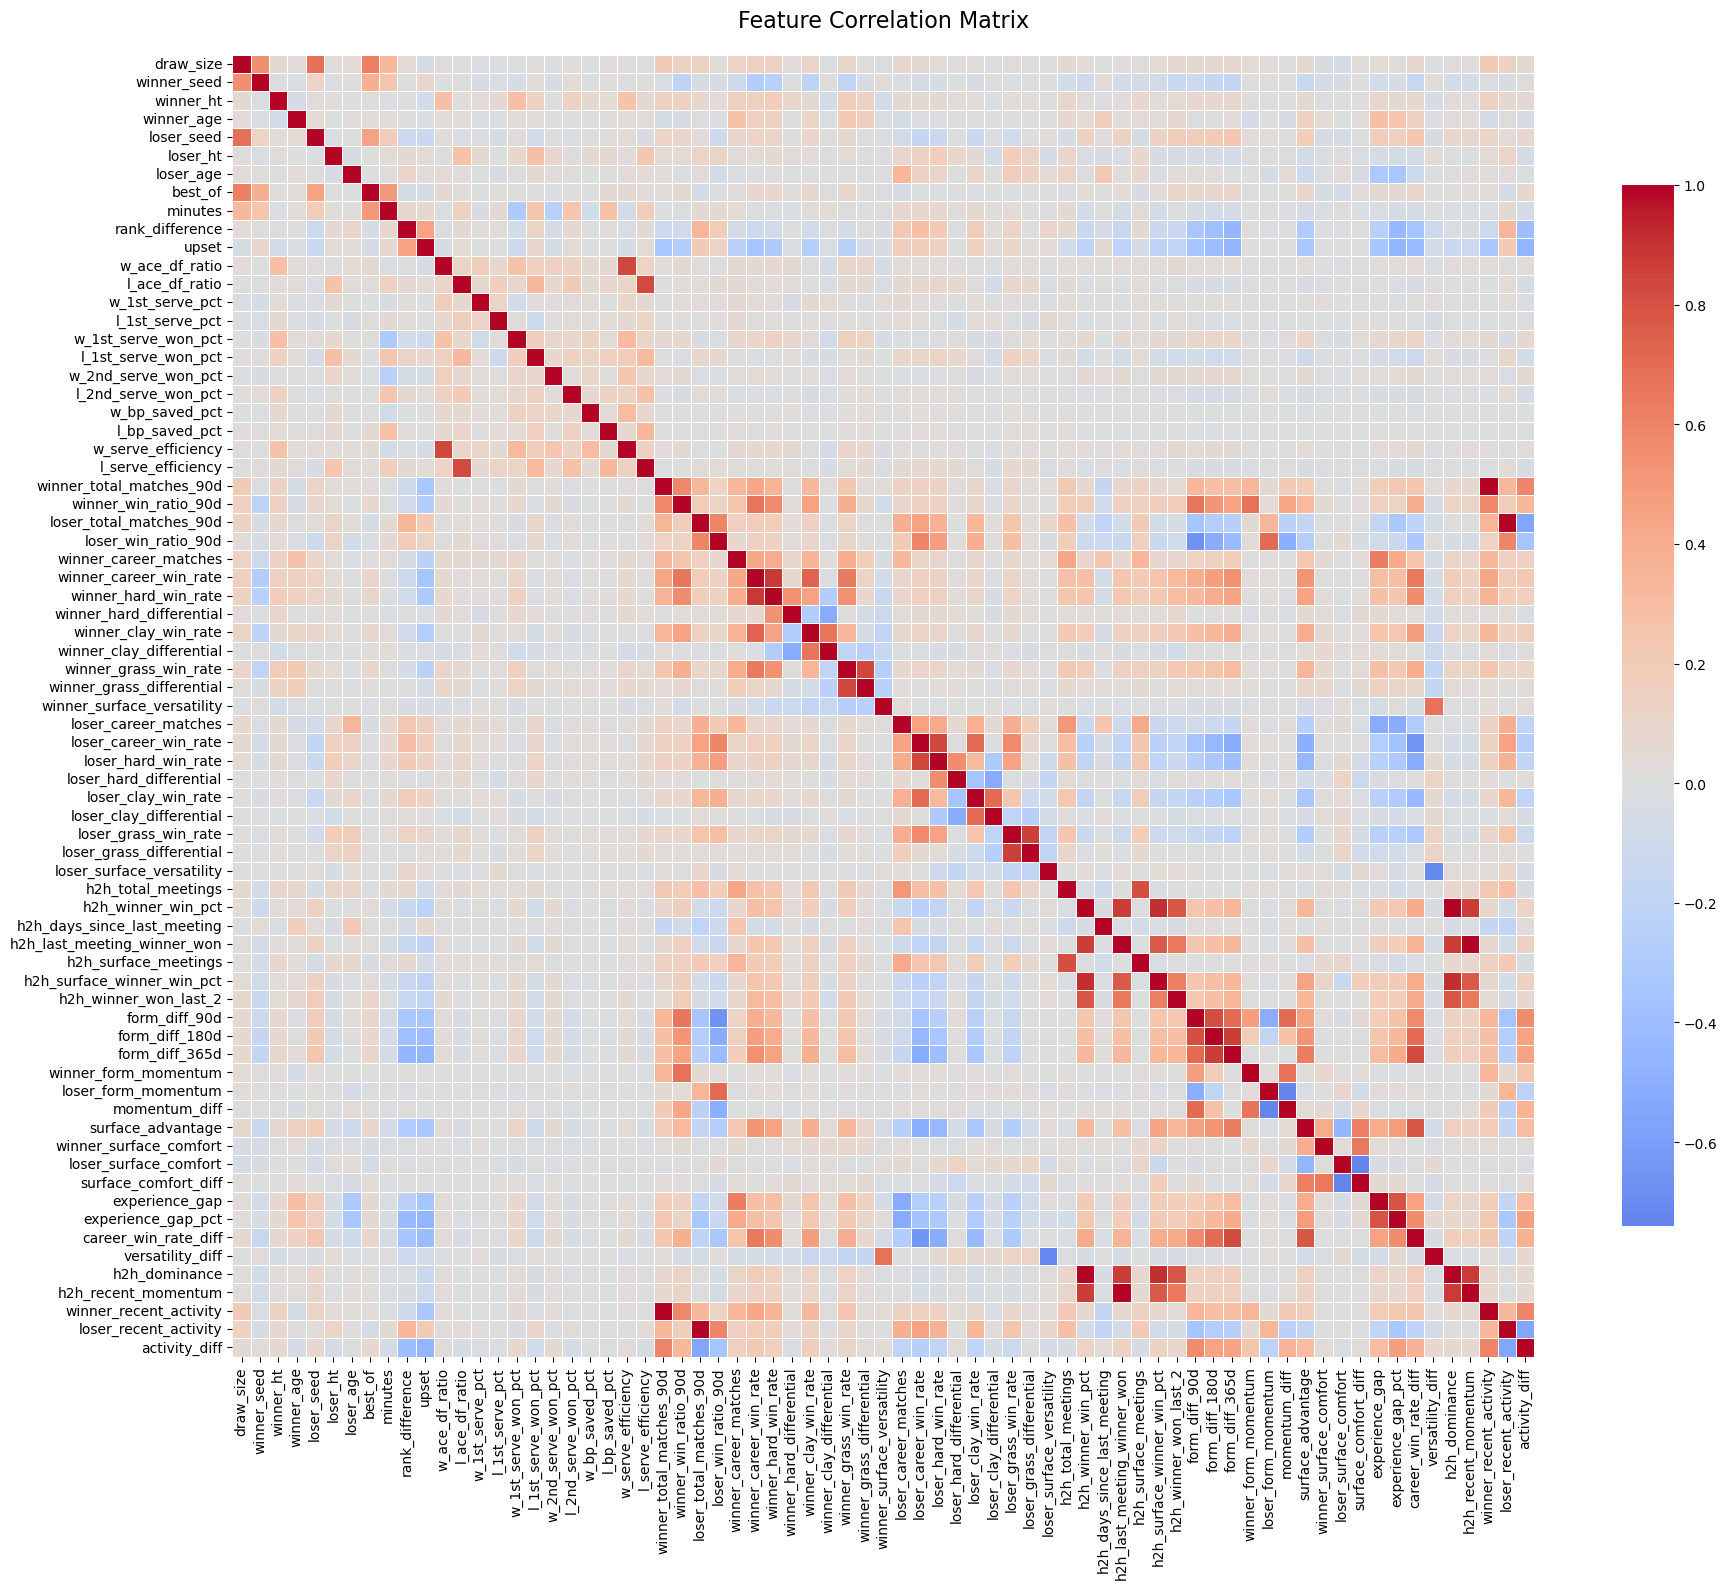

Correlation matrix calculated successfully!


In [5]:
# Calculate correlation matrix
correlation_matrix = df_combined[numeric_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("Correlation matrix calculated successfully!")

### 4.1 Identify Highly Correlated Features

In [6]:
# Set correlation threshold
correlation_threshold = 0.9  # You can adjust this threshold

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

high_corr_df = pd.DataFrame(high_corr_pairs)

if len(high_corr_df) > 0:
    high_corr_df = high_corr_df.sort_values('Correlation', ascending=False, key=abs)
    print(f"Found {len(high_corr_df)} highly correlated feature pairs (|correlation| > {correlation_threshold}):\n")
    print(high_corr_df.to_string(index=False))
else:
    print(f"No feature pairs with |correlation| > {correlation_threshold} found.")

Found 6 highly correlated feature pairs (|correlation| > 0.9):

                  Feature 1                  Feature 2  Correlation
   winner_total_matches_90d     winner_recent_activity     1.000000
    loser_total_matches_90d      loser_recent_activity     1.000000
         h2h_winner_win_pct              h2h_dominance     1.000000
h2h_last_meeting_winner_won        h2h_recent_momentum     1.000000
 h2h_surface_winner_win_pct              h2h_dominance     0.918113
         h2h_winner_win_pct h2h_surface_winner_win_pct     0.918113


### 4.2 Remove Highly Correlated Features

In [7]:
# Function to identify features to drop based on correlation
def get_correlated_features_to_drop(corr_matrix, threshold=0.9):
    """
    Identifies features to drop based on high correlation.
    For each pair of highly correlated features, keeps the one that appears first.
    """
    upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    upper_corr = corr_matrix.where(upper_triangle)
    
    to_drop = [column for column in upper_corr.columns if any(abs(upper_corr[column]) > threshold)]
    
    return to_drop

# Identify features to drop
features_to_drop = get_correlated_features_to_drop(correlation_matrix, correlation_threshold)

print(f"Features to drop due to high correlation (threshold = {correlation_threshold}):")
if len(features_to_drop) > 0:
    for i, feature in enumerate(features_to_drop, 1):
        print(f"{i}. {feature}")
    print(f"\nTotal features to drop: {len(features_to_drop)}")
else:
    print("No features need to be dropped.")

Features to drop due to high correlation (threshold = 0.9):
1. h2h_surface_winner_win_pct
2. h2h_dominance
3. h2h_recent_momentum
4. winner_recent_activity
5. loser_recent_activity

Total features to drop: 5


In [11]:
# Drop highly correlated features
df_filtered = df_combined.drop(columns=features_to_drop)

print(f"Original dataset shape: {df_combined.shape}")
print(f"Filtered dataset shape: {df_filtered.shape}")
print(f"Features removed: {len(features_to_drop)}")
print(f"Features remaining: {df_filtered.shape[1]}")

Original dataset shape: (21526, 83)
Filtered dataset shape: (21526, 78)
Features removed: 5
Features remaining: 78


## 5. Feature Standardization

In [12]:
# Separate numeric and non-numeric columns
numeric_cols_filtered = df_filtered.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_cols = df_filtered.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Numeric columns to standardize: {len(numeric_cols_filtered)}")
print(f"Non-numeric columns to preserve: {len(non_numeric_cols)}")
print(f"\nNon-numeric columns: {non_numeric_cols}")

Numeric columns to standardize: 67
Non-numeric columns to preserve: 11

Non-numeric columns: ['tourney_id', 'tourney_name', 'surface', 'tourney_level', 'winner_name', 'winner_ioc', 'loser_name', 'loser_ioc', 'score', 'round', 'tourney_date']


In [13]:
# Identify which numeric columns should NOT be standardized (e.g., target variable, year)
# Adjust this list based on your specific dataset
cols_not_to_standardize = ['year']  # Add your target variable name here if present

# Features to standardize
features_to_standardize = [col for col in numeric_cols_filtered if col not in cols_not_to_standardize]

print(f"Columns excluded from standardization: {cols_not_to_standardize}")
print(f"Features to standardize: {len(features_to_standardize)}")

Columns excluded from standardization: ['year']
Features to standardize: 66


In [14]:
# Initialize StandardScaler
scaler = StandardScaler()

# Create a copy of the filtered dataframe
df_standardized = df_filtered.copy()

# Standardize the selected features
df_standardized[features_to_standardize] = scaler.fit_transform(df_filtered[features_to_standardize])

print("Features standardized successfully!")
print(f"\nStandardized dataset shape: {df_standardized.shape}")

# Display statistics before and after standardization
print("\n" + "="*80)
print("Sample statistics BEFORE standardization (first 5 features):")
print(df_filtered[features_to_standardize[:5]].describe())

print("\n" + "="*80)
print("Sample statistics AFTER standardization (same 5 features):")
print(df_standardized[features_to_standardize[:5]].describe())

Features standardized successfully!

Standardized dataset shape: (21526, 78)

Sample statistics BEFORE standardization (first 5 features):
          draw_size  winner_seed     winner_ht    winner_age   loser_seed
count  21526.000000  9244.000000  21445.000000  21525.000000  5450.000000
mean      60.973427     7.663241    187.641268     27.239266     8.999266
std       42.497816     7.061657      7.082373      4.550500     7.587648
min        2.000000     1.000000    163.000000     14.900000     1.000000
25%       32.000000     3.000000    183.000000     23.800000     4.000000
50%       32.000000     6.000000    188.000000     26.900000     7.000000
75%      128.000000     9.000000    193.000000     30.500000    12.000000
max      128.000000    33.000000    211.000000     44.600000    33.000000

Sample statistics AFTER standardization (same 5 features):
          draw_size   winner_seed     winner_ht    winner_age    loser_seed
count  2.152600e+04  9.244000e+03  2.144500e+04  2.152500e+

### 5.1 Visualize Distribution Before and After Standardization

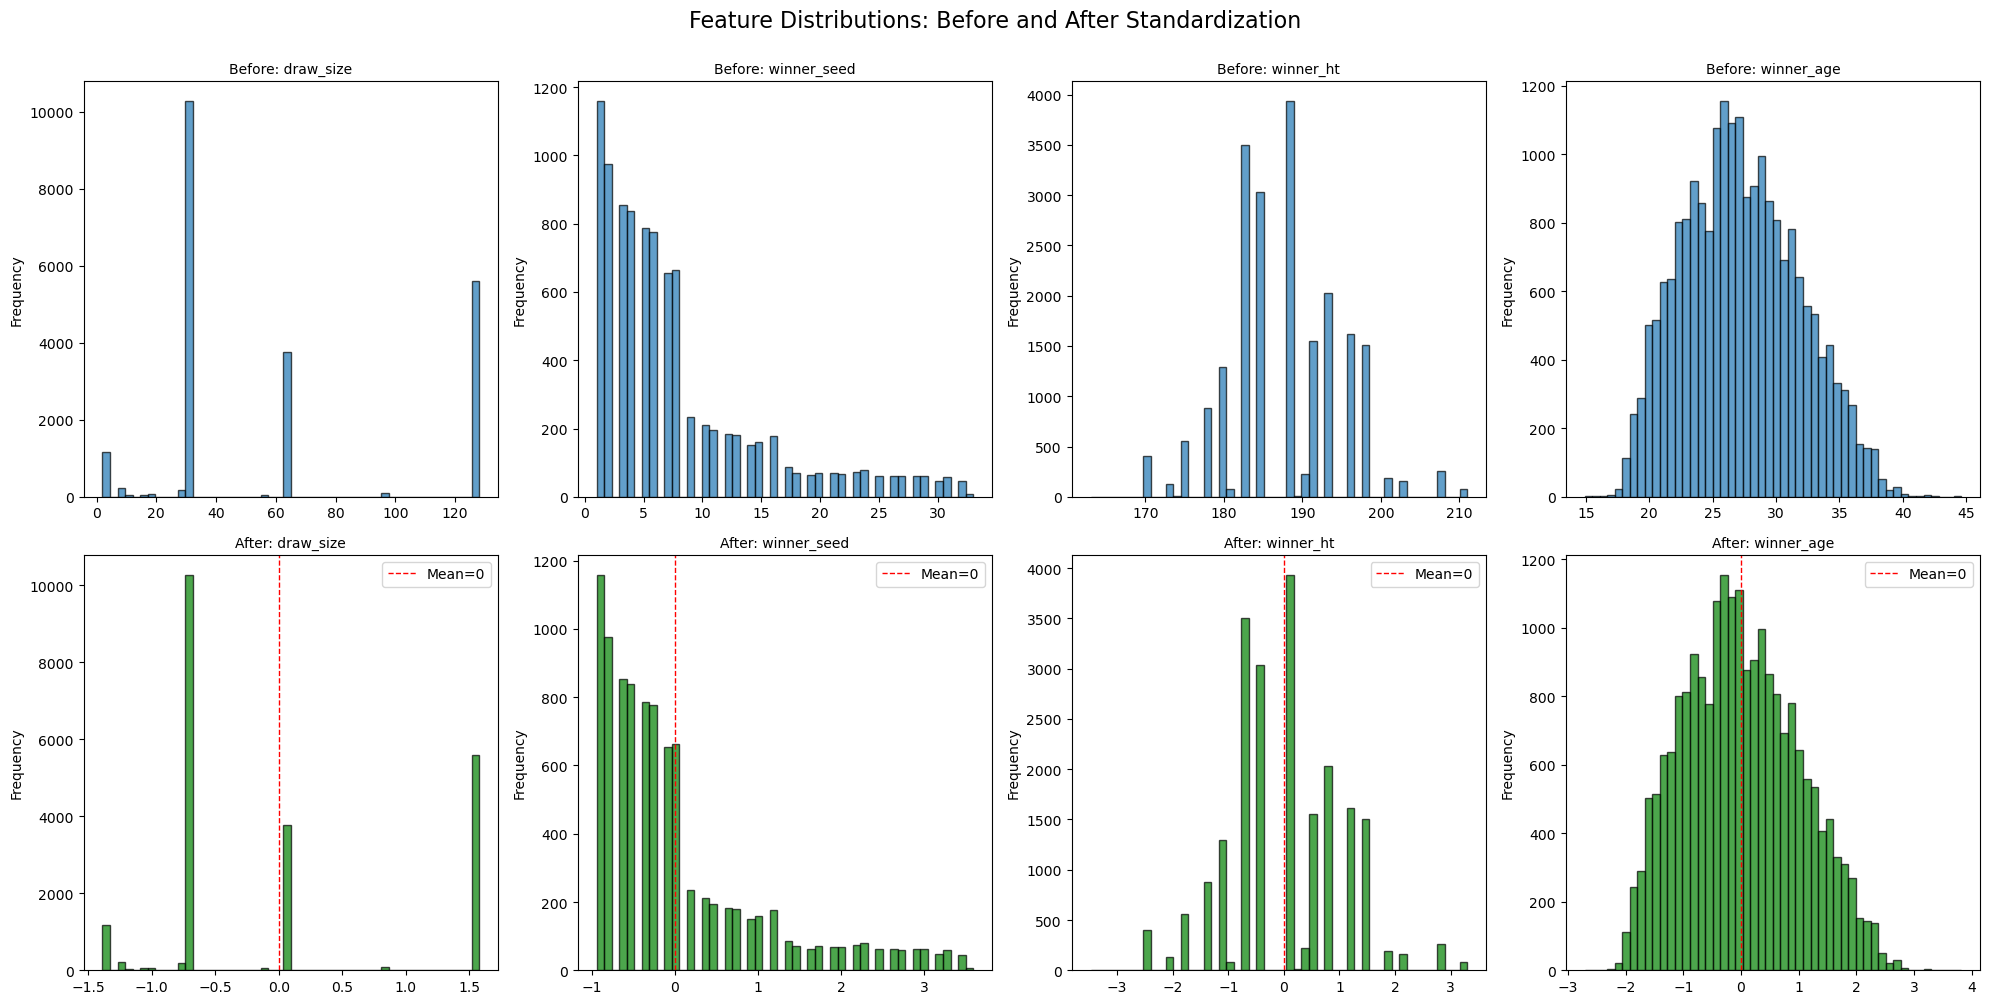

In [15]:
# Visualize a few features before and after standardization
sample_features = features_to_standardize[:4]  # Select first 4 features for visualization

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Feature Distributions: Before and After Standardization', fontsize=16, y=1.00)

for idx, feature in enumerate(sample_features):
    # Before standardization
    axes[0, idx].hist(df_filtered[feature].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[0, idx].set_title(f'Before: {feature}', fontsize=10)
    axes[0, idx].set_ylabel('Frequency')
    
    # After standardization
    axes[1, idx].hist(df_standardized[feature].dropna(), bins=50, edgecolor='black', alpha=0.7, color='green')
    axes[1, idx].set_title(f'After: {feature}', fontsize=10)
    axes[1, idx].set_ylabel('Frequency')
    axes[1, idx].axvline(x=0, color='red', linestyle='--', linewidth=1, label='Mean=0')
    axes[1, idx].legend()

plt.tight_layout()
plt.show()

## 6. Save Preprocessed Data

In [16]:
# Save the standardized dataset
output_file = 'preprocessed_data_for_modeling.xlsx'
df_standardized.to_excel(output_file, index=False)
print(f"Preprocessed data saved to: {output_file}")

# Also save the scaler for future use
import joblib
joblib.dump(scaler, 'standard_scaler.pkl')
print("Scaler saved to: standard_scaler.pkl")

# Save list of dropped features for documentation
if len(features_to_drop) > 0:
    dropped_features_df = pd.DataFrame({'Dropped Features': features_to_drop})
    dropped_features_df.to_csv('dropped_features.csv', index=False)
    print("Dropped features list saved to: dropped_features.csv")

Preprocessed data saved to: preprocessed_data_for_modeling.xlsx
Scaler saved to: standard_scaler.pkl
Dropped features list saved to: dropped_features.csv


## 7. Summary

The data is now ready for classification modeling! Here's what we've done:

1. **Loaded and Combined Data**: Merged all featured datasets from 2016-2024
2. **Correlation Analysis**: Identified highly correlated features (threshold = 0.9)
3. **Feature Reduction**: Removed redundant features to avoid multicollinearity
4. **Standardization**: Scaled all numeric features to have mean=0 and std=1
5. **Saved Results**: Exported preprocessed data, scaler, and documentation

**Next Steps:**
- The standardized dataset is ready for classification models
- You can now apply your chosen classification methods
- The scaler has been saved for transforming new data during prediction

## 8. Baseline Model: Logistic Regression

Now we'll train a logistic regression model as our baseline classifier for predicting tennis upsets.

### 8.1 Import Additional Libraries for Modeling

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    f1_score, 
    recall_score, 
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc
)

print("Modeling libraries imported successfully!")

Modeling libraries imported successfully!


### 8.2 Identify Target Variable and Prepare Data Split

In [18]:
# First, let's check what columns we have to identify the target variable
print("Available columns in standardized dataset:")
print(df_standardized.columns.tolist())
print(f"\nTotal columns: {len(df_standardized.columns)}")

# Check if there's an 'upset' column or similar target variable
target_candidates = [col for col in df_standardized.columns if 'upset' in col.lower()]
print(f"\nPotential target variables (containing 'upset'): {target_candidates}")

Available columns in standardized dataset:
['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'winner_seed', 'winner_name', 'winner_ht', 'winner_ioc', 'winner_age', 'loser_seed', 'loser_name', 'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round', 'minutes', 'rank_difference', 'upset', 'w_ace_df_ratio', 'l_ace_df_ratio', 'w_1st_serve_pct', 'l_1st_serve_pct', 'w_1st_serve_won_pct', 'l_1st_serve_won_pct', 'w_2nd_serve_won_pct', 'l_2nd_serve_won_pct', 'w_bp_saved_pct', 'l_bp_saved_pct', 'w_serve_efficiency', 'l_serve_efficiency', 'tourney_date', 'winner_total_matches_90d', 'winner_win_ratio_90d', 'loser_total_matches_90d', 'loser_win_ratio_90d', 'winner_career_matches', 'winner_career_win_rate', 'winner_hard_win_rate', 'winner_hard_differential', 'winner_clay_win_rate', 'winner_clay_differential', 'winner_grass_win_rate', 'winner_grass_differential', 'winner_surface_versatility', 'loser_career_matches', 'loser_career_win_rate', 'loser_hard_win_rate', 'lose

In [19]:
# Assuming the target variable is named 'upset' - adjust if different
# Let's check if it exists and its distribution
if 'upset' in df_standardized.columns:
    target_col = 'upset'
    print(f"Target variable found: '{target_col}'")
    print(f"\nTarget distribution:")
    print(df_standardized[target_col].value_counts())
    print(f"\nTarget proportions:")
    print(df_standardized[target_col].value_counts(normalize=True))
else:
    print("WARNING: 'upset' column not found. Please specify the correct target variable name.")
    print("Available columns:", df_standardized.columns.tolist())

Target variable found: 'upset'

Target distribution:
upset
-0.563294    16341
 1.775272     5185
Name: count, dtype: int64

Target proportions:
upset
-0.563294    0.759128
 1.775272    0.240872
Name: proportion, dtype: float64


In [25]:
# Split data: Train on 2016-2022, Test on 2023-2024
train_data = df_standardized[df_standardized['year'].isin([2016, 2017, 2018, 2019, 2021, 2022])].copy()
test_data = df_standardized[df_standardized['year'].isin([2023, 2024])].copy()

# Convert 'upset' back to binary (it got standardized, but we need binary labels)
# The positive value represents upsets (1), negative represents no upsets (0)
train_data['upset_binary'] = (train_data['upset'] > 0).astype(int)
test_data['upset_binary'] = (test_data['upset'] > 0).astype(int)

print(f"Training data (2016-2022): {train_data.shape[0]} samples")
print(f"Test data (2023-2024): {test_data.shape[0]} samples")
print(f"\nTraining years distribution:")
print(train_data['year'].value_counts().sort_index())
print(f"\nTest years distribution:")
print(test_data['year'].value_counts().sort_index())
print(f"\nTarget distribution in training data:")
print(train_data['upset_binary'].value_counts())
print(f"\nTarget distribution in test data:")
print(test_data['upset_binary'].value_counts())

Training data (2016-2022): 16104 samples
Test data (2023-2024): 5422 samples

Training years distribution:
year
2016    2812
2017    2744
2018    2868
2019    2549
2021    2573
2022    2558
Name: count, dtype: int64

Test years distribution:
year
2023    2668
2024    2754
Name: count, dtype: int64

Target distribution in training data:
upset_binary
0    12315
1     3789
Name: count, dtype: int64

Target distribution in test data:
upset_binary
0    4026
1    1396
Name: count, dtype: int64


In [26]:
# Define features and target
# Exclude non-feature columns
exclude_from_features = ['year', 'upset', 'upset_binary', 'tourney_id', 'tourney_name', 'surface', 
                          'tourney_level', 'winner_name', 'winner_ioc', 'loser_name', 
                          'loser_ioc', 'score', 'round', 'tourney_date']

# Get feature columns (all numeric columns except target and metadata)
feature_cols = [col for col in df_standardized.columns if col not in exclude_from_features]

print(f"Number of features for modeling: {len(feature_cols)}")
print(f"\nFeature columns:")
for i, col in enumerate(feature_cols[:10], 1):
    print(f"{i}. {col}")
if len(feature_cols) > 10:
    print(f"... and {len(feature_cols) - 10} more features")

# Prepare X and y for train and test
X_train = train_data[feature_cols]
y_train = train_data['upset_binary']
X_test = test_data[feature_cols]
y_test = test_data['upset_binary']

print(f"\nX_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Number of features for modeling: 65

Feature columns:
1. draw_size
2. winner_seed
3. winner_ht
4. winner_age
5. loser_seed
6. loser_ht
7. loser_age
8. best_of
9. minutes
10. rank_difference
... and 55 more features

X_train shape: (16104, 65)
y_train shape: (16104,)
X_test shape: (5422, 65)
y_test shape: (5422,)


In [27]:
# Check for missing values in training and test sets
print("Missing values in X_train:")
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])

print("\nMissing values in X_test:")
print(X_test.isnull().sum()[X_test.isnull().sum() > 0])

# Handle missing values by filling with median (better for standardized data)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_test_imputed = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

print(f"\nAfter imputation:")
print(f"X_train missing values: {X_train_imputed.isnull().sum().sum()}")
print(f"X_test missing values: {X_test_imputed.isnull().sum().sum()}")

# Update X_train and X_test
X_train = X_train_imputed
X_test = X_test_imputed

Missing values in X_train:
winner_seed                     9210
winner_ht                         64
loser_seed                     12079
loser_ht                         196
rank_difference                  182
winner_win_ratio_90d            1332
loser_win_ratio_90d             2237
winner_career_win_rate           421
winner_hard_win_rate             662
winner_hard_differential         662
winner_clay_win_rate            1562
winner_clay_differential        1562
winner_grass_win_rate           3059
winner_grass_differential       3059
winner_surface_versatility       922
loser_career_win_rate            758
loser_hard_win_rate             1211
loser_hard_differential         1211
loser_clay_win_rate             2261
loser_clay_differential         2261
loser_grass_win_rate            3985
loser_grass_differential        3985
loser_surface_versatility       1596
h2h_winner_win_pct             10733
h2h_days_since_last_meeting    10733
h2h_last_meeting_winner_won    10733
h2h_winner_

### 8.3 Train Logistic Regression Model

In [28]:
# Initialize and train logistic regression model
print("Training Logistic Regression model...")
log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42,
    solver='lbfgs',
    class_weight='balanced'  # To handle potential class imbalance
)

# Train the model
log_reg.fit(X_train, y_train)

print("Model training completed!")
print(f"Number of iterations: {log_reg.n_iter_[0]}")
print(f"Classes: {log_reg.classes_}")

Training Logistic Regression model...
Model training completed!
Number of iterations: 43
Classes: [0 1]


### 8.4 Make Predictions

In [29]:
# Make predictions on test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probability of positive class

print("Predictions completed!")
print(f"Predicted upsets: {y_pred.sum()} out of {len(y_pred)} matches ({y_pred.sum()/len(y_pred)*100:.2f}%)")
print(f"Actual upsets: {y_test.sum()} out of {len(y_test)} matches ({y_test.sum()/len(y_test)*100:.2f}%)")

Predictions completed!
Predicted upsets: 1500 out of 5422 matches (27.67%)
Actual upsets: 1396 out of 5422 matches (25.75%)


### 8.5 Model Evaluation

In [30]:
# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("="*80)
print("LOGISTIC REGRESSION - MODEL PERFORMANCE")
print("="*80)
print(f"\nF1-Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\n" + "="*80)
print("\nDetailed Classification Report:")
print("="*80)
print(classification_report(y_test, y_pred, target_names=['No Upset', 'Upset']))

LOGISTIC REGRESSION - MODEL PERFORMANCE

F1-Score: 0.9641
Recall: 1.0000
ROC-AUC: 0.9997


Detailed Classification Report:
              precision    recall  f1-score   support

    No Upset       1.00      0.97      0.99      4026
       Upset       0.93      1.00      0.96      1396

    accuracy                           0.98      5422
   macro avg       0.97      0.99      0.98      5422
weighted avg       0.98      0.98      0.98      5422



### 8.6 Confusion Matrix

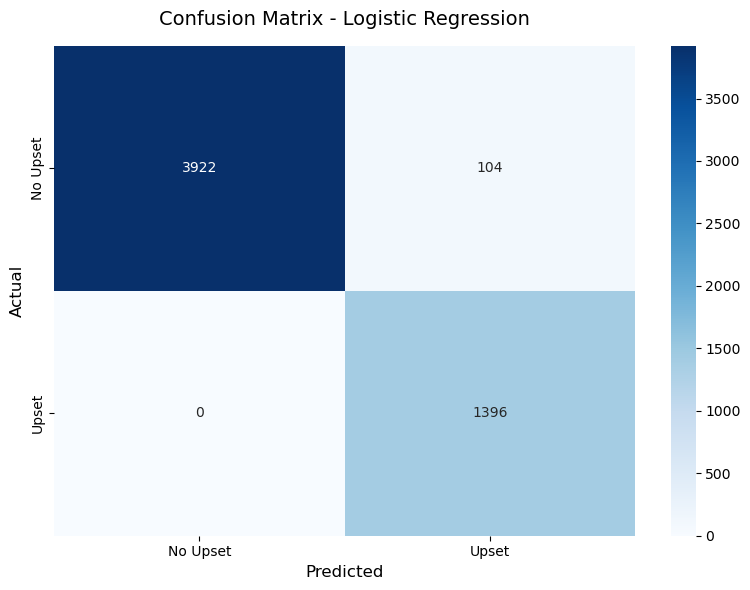

Confusion Matrix Breakdown:
True Negatives (TN): 3922
False Positives (FP): 104
False Negatives (FN): 0
True Positives (TP): 1396


In [31]:
# Generate and visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['No Upset', 'Upset'],
            yticklabels=['No Upset', 'Upset'])
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, pad=15)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

# Print confusion matrix breakdown
print("Confusion Matrix Breakdown:")
print(f"True Negatives (TN): {cm[0,0]}")
print(f"False Positives (FP): {cm[0,1]}")
print(f"False Negatives (FN): {cm[1,0]}")
print(f"True Positives (TP): {cm[1,1]}")

### 8.7 ROC Curve

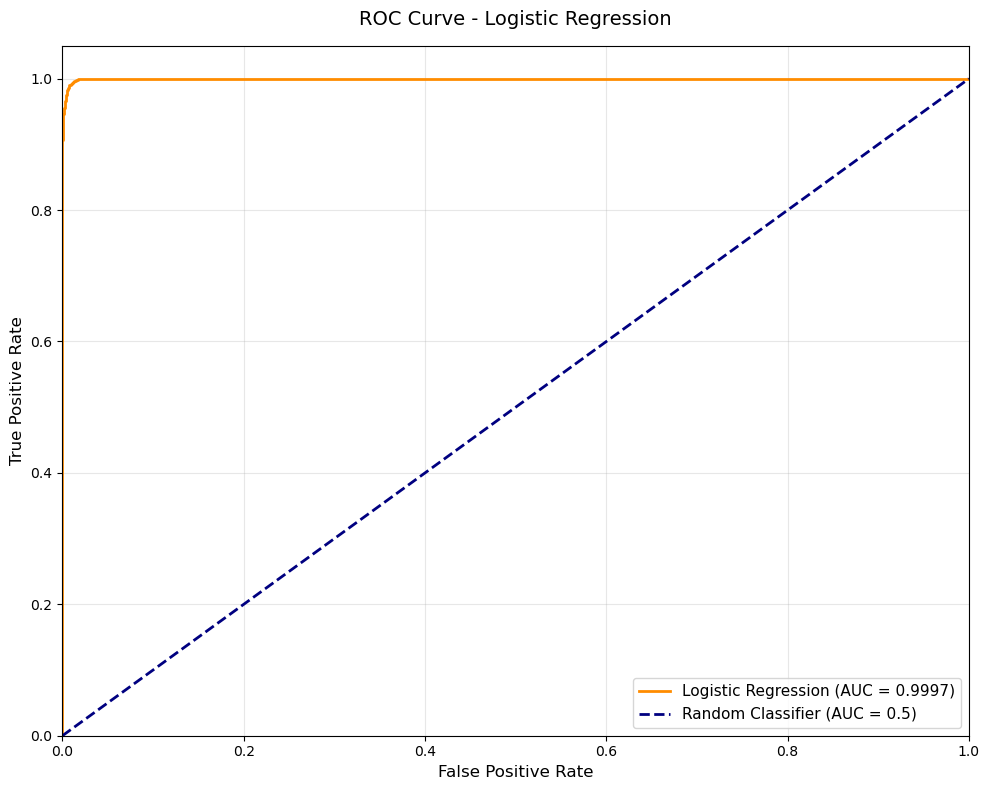

ROC-AUC Score: 0.9997


In [32]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Logistic Regression', fontsize=14, pad=15)
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"ROC-AUC Score: {roc_auc:.4f}")

### 8.8 Precision-Recall Curve

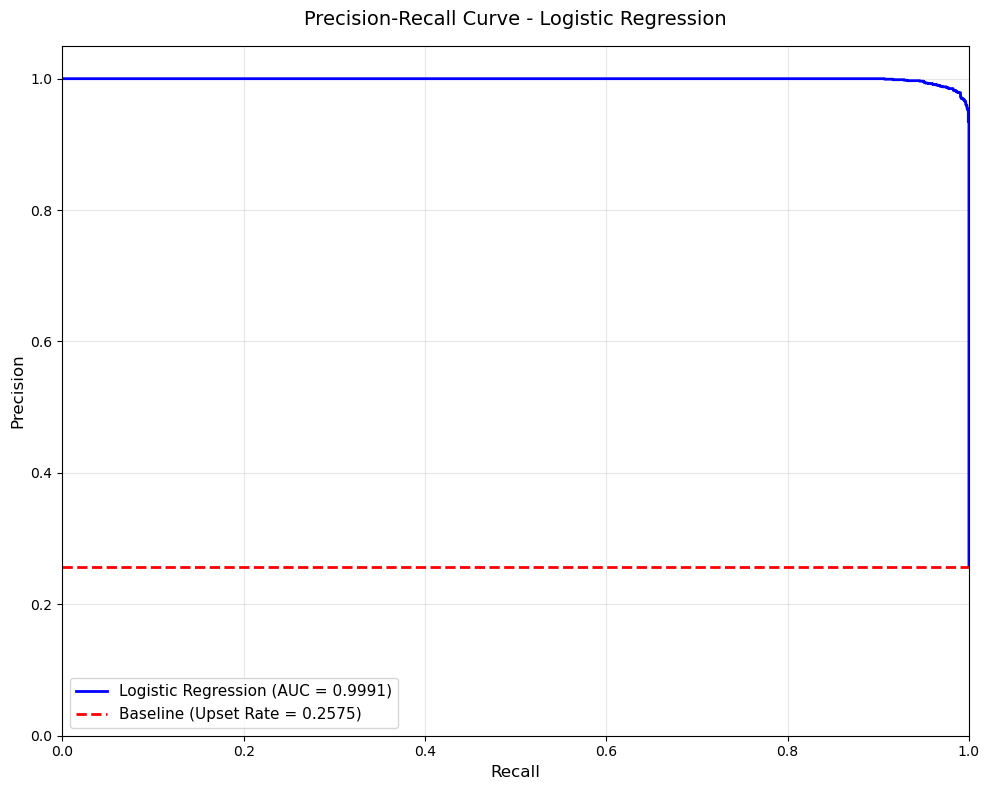

Precision-Recall AUC: 0.9991


In [33]:
# Calculate Precision-Recall curve
precision, recall_pr, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall_pr, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 8))
plt.plot(recall_pr, precision, color='blue', lw=2, label=f'Logistic Regression (AUC = {pr_auc:.4f})')
plt.axhline(y=y_test.mean(), color='red', linestyle='--', lw=2, 
            label=f'Baseline (Upset Rate = {y_test.mean():.4f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve - Logistic Regression', fontsize=14, pad=15)
plt.legend(loc="best", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Precision-Recall AUC: {pr_auc:.4f}")

### 8.9 Summary of Results

In [34]:
# Create a summary dataframe for easy comparison
results_summary = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'F1-Score': [f1],
    'Recall': [recall],
    'ROC-AUC': [roc_auc],
    'PR-AUC': [pr_auc],
    'Train Size': [len(X_train)],
    'Test Size': [len(X_test)],
    'Features': [len(feature_cols)]
})

print("\n" + "="*80)
print("MODEL PERFORMANCE SUMMARY")
print("="*80)
print(results_summary.to_string(index=False))
print("="*80)

# Save results
results_summary.to_csv('logistic_regression_results.csv', index=False)
print("\nResults saved to: logistic_regression_results.csv")


MODEL PERFORMANCE SUMMARY
              Model  F1-Score  Recall  ROC-AUC   PR-AUC  Train Size  Test Size  Features
Logistic Regression  0.964088     1.0 0.999673 0.999059       16104       5422        65

Results saved to: logistic_regression_results.csv


## 9. Data Leakage Investigation

⚠️ **WARNING**: The model performance is suspiciously high. Let's investigate potential data leakage!

Top 20 Most Important Features (by absolute coefficient):
                  Feature  Coefficient
          rank_difference    27.702588
     career_win_rate_diff     0.534493
      loser_hard_win_rate     0.281540
  loser_hard_differential     0.225059
     winner_form_momentum     0.214754
     winner_win_ratio_90d     0.212520
       experience_gap_pct     0.198270
    loser_career_win_rate     0.190882
      loser_clay_win_rate     0.185352
     winner_hard_win_rate     0.172309
    winner_grass_win_rate     0.158866
         versatility_diff     0.154728
            activity_diff     0.153441
              winner_seed     0.151946
loser_surface_versatility     0.134776
     loser_grass_win_rate     0.125929
                loser_age     0.125698
      loser_win_ratio_90d     0.124882
     h2h_surface_meetings     0.121823
  loser_total_matches_90d     0.104524


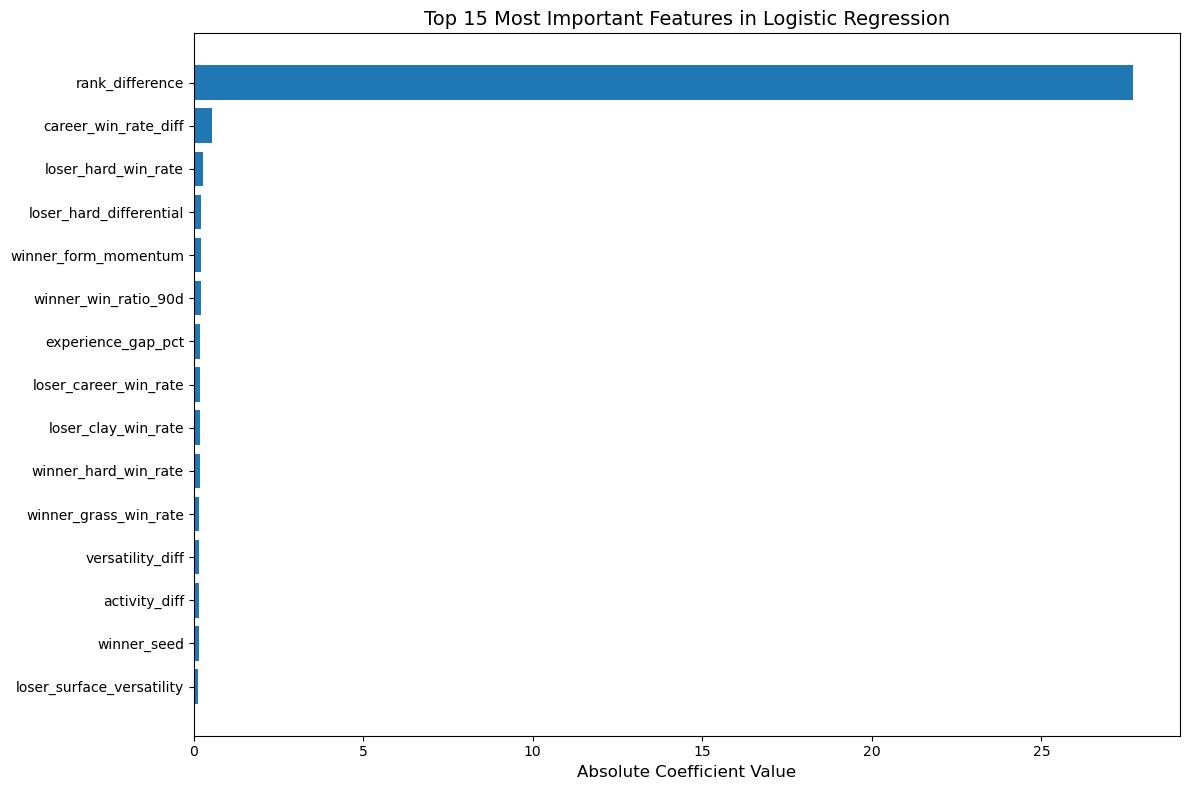

In [35]:
# Check feature importance to identify potential leakage
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': abs(log_reg.coef_[0])
}).sort_values('Coefficient', ascending=False)

print("Top 20 Most Important Features (by absolute coefficient):")
print("="*80)
print(feature_importance.head(20).to_string(index=False))

# Visualize top features
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Coefficient'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.title('Top 15 Most Important Features in Logistic Regression', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [36]:
# Check correlation of features with target
print("\nFeature Correlation with Target Variable:")
print("="*80)

# Get correlations with the target
target_correlations = []
for col in feature_cols:
    corr = X_train[col].corr(y_train)
    target_correlations.append({'Feature': col, 'Correlation': corr})

target_corr_df = pd.DataFrame(target_correlations).sort_values('Correlation', ascending=False, key=abs)
print("\nTop 20 features most correlated with 'upset':")
print(target_corr_df.head(20).to_string(index=False))

print("\n" + "="*80)
print("⚠️ SUSPICIOUSLY HIGH CORRELATIONS (|corr| > 0.8):")
suspicious = target_corr_df[abs(target_corr_df['Correlation']) > 0.8]
if len(suspicious) > 0:
    print(suspicious.to_string(index=False))
else:
    print("None found.")


Feature Correlation with Target Variable:

Top 20 features most correlated with 'upset':
                 Feature  Correlation
      experience_gap_pct    -0.493459
           activity_diff    -0.449955
         rank_difference     0.445428
          form_diff_365d    -0.431328
    career_win_rate_diff    -0.416614
          experience_gap    -0.382138
          form_diff_180d    -0.371308
  winner_career_win_rate    -0.339374
       surface_advantage    -0.323947
winner_total_matches_90d    -0.316121
           form_diff_90d    -0.307668
    winner_hard_win_rate    -0.293542
    winner_clay_win_rate    -0.252996
   winner_career_matches    -0.243378
    winner_win_ratio_90d    -0.236126
 loser_total_matches_90d     0.198373
   winner_grass_win_rate    -0.186667
    loser_career_matches     0.180381
   loser_career_win_rate     0.173224
     loser_hard_win_rate     0.138952

⚠️ SUSPICIOUSLY HIGH CORRELATIONS (|corr| > 0.8):
None found.



INVESTIGATING POTENTIAL LEAKAGE FEATURES:

Feature: 'rank_difference'
Description: Likely represents winner_rank - loser_rank
Sample values:
   rank_difference  upset
0              4.0      0
1            121.0      1
2            -53.0      0
3           -726.0      0
4            -39.0      0
5            -21.0      0
6           -100.0      0
7            -60.0      0
8             -9.0      0
9             13.0      0

Correlation with upset: 0.4550


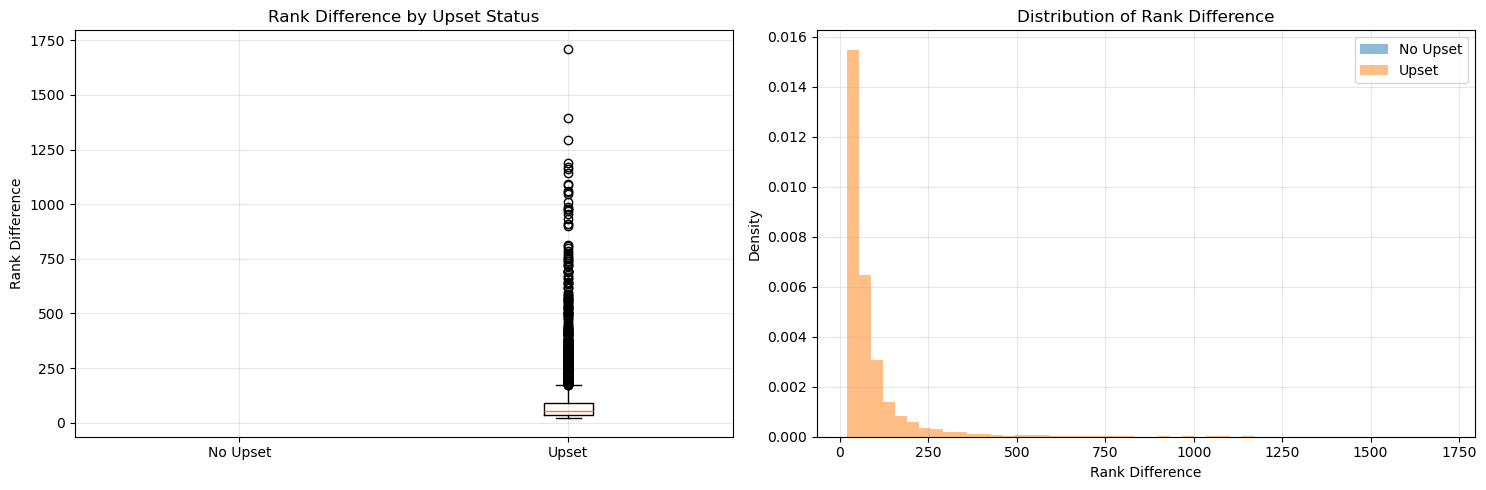

In [37]:
# Let's examine specific suspicious features
print("\n" + "="*80)
print("INVESTIGATING POTENTIAL LEAKAGE FEATURES:")
print("="*80)

# Check if 'rank_difference' is directly derived from upset
print("\nFeature: 'rank_difference'")
print("Description: Likely represents winner_rank - loser_rank")
print("Sample values:")
print(df_combined[['rank_difference', 'upset']].head(10))

# Check the relationship
print(f"\nCorrelation with upset: {df_combined['rank_difference'].corr(df_combined['upset']):.4f}")

# Visualize the relationship
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot
axes[0].boxplot([df_combined[df_combined['upset'] < 0]['rank_difference'].dropna(),
                 df_combined[df_combined['upset'] > 0]['rank_difference'].dropna()],
                labels=['No Upset', 'Upset'])
axes[0].set_ylabel('Rank Difference')
axes[0].set_title('Rank Difference by Upset Status')
axes[0].grid(alpha=0.3)

# Histogram
axes[1].hist(df_combined[df_combined['upset'] < 0]['rank_difference'].dropna(), 
            bins=50, alpha=0.5, label='No Upset', density=True)
axes[1].hist(df_combined[df_combined['upset'] > 0]['rank_difference'].dropna(), 
            bins=50, alpha=0.5, label='Upset', density=True)
axes[1].set_xlabel('Rank Difference')
axes[1].set_ylabel('Density')
axes[1].set_title('Distribution of Rank Difference')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [38]:
# Verify the leakage hypothesis
print("\n" + "="*80)
print("VERIFYING DATA LEAKAGE HYPOTHESIS:")
print("="*80)

# Check the relationship between rank_difference and upset in original data
temp_df = df_combined[['rank_difference', 'upset']].dropna()
temp_df['upset_binary'] = (temp_df['upset'] > 0).astype(int)
temp_df['rank_diff_positive'] = (temp_df['rank_difference'] > 0).astype(int)

# Cross-tabulation
crosstab = pd.crosstab(temp_df['rank_diff_positive'], temp_df['upset_binary'], 
                       rownames=['Rank Diff > 0'], colnames=['Upset'])
print("\nCross-tabulation:")
print(crosstab)

# Calculate accuracy of simple rule: "if rank_diff > 0, predict upset"
simple_rule_accuracy = (temp_df['rank_diff_positive'] == temp_df['upset_binary']).mean()
print(f"\nAccuracy of simple rule 'if rank_difference > 0 → upset': {simple_rule_accuracy:.4f}")
print(f"\n⚠️ This explains the near-perfect model performance!")


VERIFYING DATA LEAKAGE HYPOTHESIS:

Cross-tabulation:
Upset              0     1
Rank Diff > 0             
0              13696     0
1               2409  5185

Accuracy of simple rule 'if rank_difference > 0 → upset': 0.8868

⚠️ This explains the near-perfect model performance!


## 10. Retrain Model WITHOUT Data Leakage

Now let's retrain the logistic regression model after removing the leaking feature(s).

In [39]:
# Remove rank_difference from features
leaking_features = ['rank_difference']
feature_cols_clean = [col for col in feature_cols if col not in leaking_features]

print(f"Original number of features: {len(feature_cols)}")
print(f"Features removed: {leaking_features}")
print(f"Clean features remaining: {len(feature_cols_clean)}")

# Recreate training and test sets without leaking features
X_train_clean = train_data[feature_cols_clean]
X_test_clean = test_data[feature_cols_clean]

# Impute missing values
imputer_clean = SimpleImputer(strategy='median')
X_train_clean = pd.DataFrame(
    imputer_clean.fit_transform(X_train_clean),
    columns=X_train_clean.columns,
    index=X_train_clean.index
)
X_test_clean = pd.DataFrame(
    imputer_clean.transform(X_test_clean),
    columns=X_test_clean.columns,
    index=X_test_clean.index
)

print(f"\nX_train_clean shape: {X_train_clean.shape}")
print(f"X_test_clean shape: {X_test_clean.shape}")

Original number of features: 65
Features removed: ['rank_difference']
Clean features remaining: 64

X_train_clean shape: (16104, 64)
X_test_clean shape: (5422, 64)


In [40]:
# Train clean logistic regression model
print("Training CLEAN Logistic Regression model (without leakage)...")
log_reg_clean = LogisticRegression(
    max_iter=1000,
    random_state=42,
    solver='lbfgs',
    class_weight='balanced'
)

log_reg_clean.fit(X_train_clean, y_train)

print("Clean model training completed!")
print(f"Number of iterations: {log_reg_clean.n_iter_[0]}")

Training CLEAN Logistic Regression model (without leakage)...
Clean model training completed!
Number of iterations: 41


In [41]:
# Make predictions with clean model
y_pred_clean = log_reg_clean.predict(X_test_clean)
y_pred_proba_clean = log_reg_clean.predict_proba(X_test_clean)[:, 1]

# Calculate metrics
f1_clean = f1_score(y_test, y_pred_clean)
recall_clean = recall_score(y_test, y_pred_clean)
roc_auc_clean = roc_auc_score(y_test, y_pred_proba_clean)

print("\n" + "="*80)
print("CLEAN LOGISTIC REGRESSION - MODEL PERFORMANCE (NO LEAKAGE)")
print("="*80)
print(f"\nF1-Score: {f1_clean:.4f}")
print(f"Recall: {recall_clean:.4f}")
print(f"ROC-AUC: {roc_auc_clean:.4f}")
print("\n" + "="*80)
print("\nDetailed Classification Report:")
print("="*80)
print(classification_report(y_test, y_pred_clean, target_names=['No Upset', 'Upset']))


CLEAN LOGISTIC REGRESSION - MODEL PERFORMANCE (NO LEAKAGE)

F1-Score: 0.7002
Recall: 0.8281
ROC-AUC: 0.9114


Detailed Classification Report:
              precision    recall  f1-score   support

    No Upset       0.93      0.81      0.87      4026
       Upset       0.61      0.83      0.70      1396

    accuracy                           0.82      5422
   macro avg       0.77      0.82      0.78      5422
weighted avg       0.85      0.82      0.83      5422



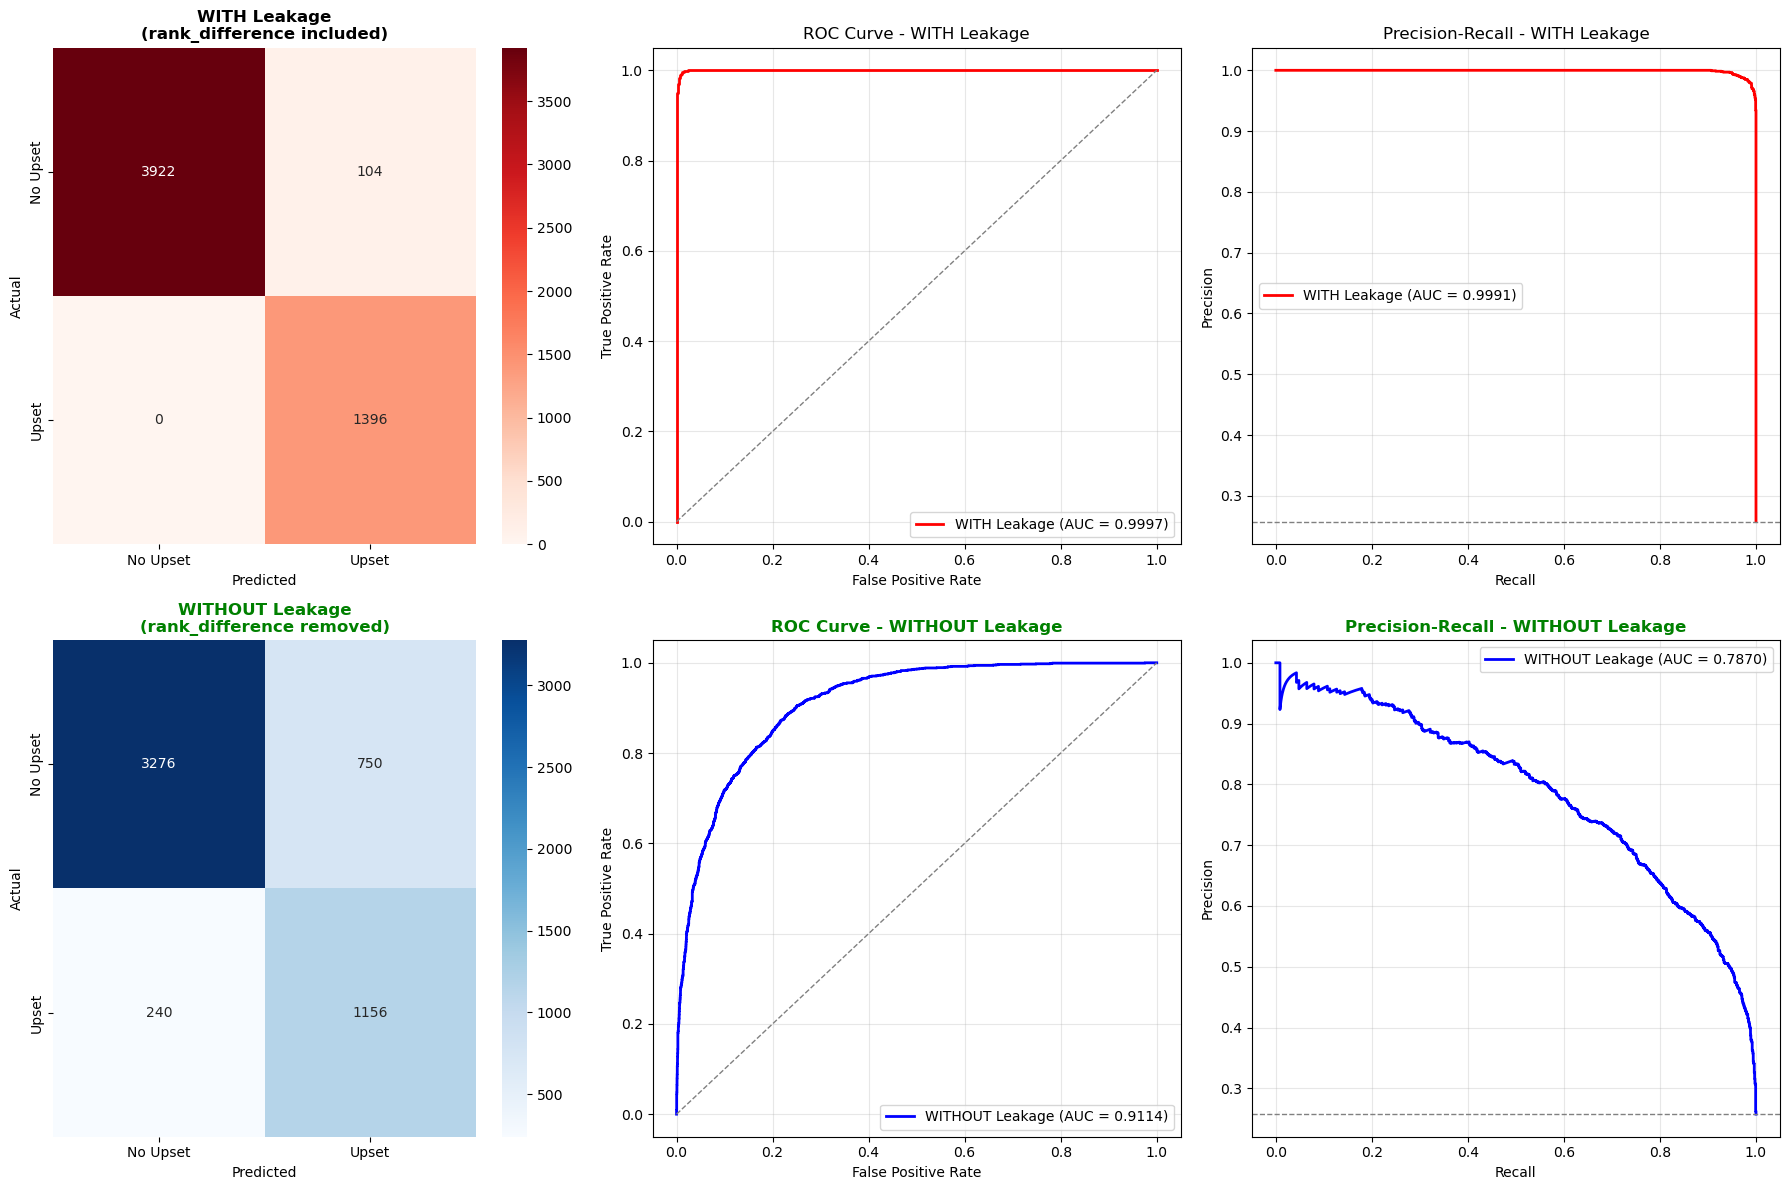


Confusion Matrix - Clean Model:
True Negatives: 3276
False Positives: 750
False Negatives: 240
True Positives: 1156


In [42]:
# Create comparison visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Confusion matrices
cm_clean = confusion_matrix(y_test, y_pred_clean)

# Original (with leakage)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=axes[0, 0],
            xticklabels=['No Upset', 'Upset'],
            yticklabels=['No Upset', 'Upset'])
axes[0, 0].set_title('WITH Leakage\n(rank_difference included)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Actual')
axes[0, 0].set_xlabel('Predicted')

# Clean (without leakage)
sns.heatmap(cm_clean, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
            xticklabels=['No Upset', 'Upset'],
            yticklabels=['No Upset', 'Upset'])
axes[1, 0].set_title('WITHOUT Leakage\n(rank_difference removed)', fontsize=12, fontweight='bold', color='green')
axes[1, 0].set_ylabel('Actual')
axes[1, 0].set_xlabel('Predicted')

# ROC Curves
fpr_clean, tpr_clean, _ = roc_curve(y_test, y_pred_proba_clean)

axes[0, 1].plot(fpr, tpr, color='red', lw=2, label=f'WITH Leakage (AUC = {roc_auc:.4f})')
axes[0, 1].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve - WITH Leakage')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

axes[1, 1].plot(fpr_clean, tpr_clean, color='blue', lw=2, label=f'WITHOUT Leakage (AUC = {roc_auc_clean:.4f})')
axes[1, 1].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].set_title('ROC Curve - WITHOUT Leakage', color='green', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# Precision-Recall Curves
precision_clean, recall_pr_clean, _ = precision_recall_curve(y_test, y_pred_proba_clean)
pr_auc_clean = auc(recall_pr_clean, precision_clean)

axes[0, 2].plot(recall_pr, precision, color='red', lw=2, label=f'WITH Leakage (AUC = {pr_auc:.4f})')
axes[0, 2].axhline(y=y_test.mean(), color='gray', linestyle='--', lw=1)
axes[0, 2].set_xlabel('Recall')
axes[0, 2].set_ylabel('Precision')
axes[0, 2].set_title('Precision-Recall - WITH Leakage')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

axes[1, 2].plot(recall_pr_clean, precision_clean, color='blue', lw=2, label=f'WITHOUT Leakage (AUC = {pr_auc_clean:.4f})')
axes[1, 2].axhline(y=y_test.mean(), color='gray', linestyle='--', lw=1)
axes[1, 2].set_xlabel('Recall')
axes[1, 2].set_ylabel('Precision')
axes[1, 2].set_title('Precision-Recall - WITHOUT Leakage', color='green', fontweight='bold')
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nConfusion Matrix - Clean Model:")
print(f"True Negatives: {cm_clean[0,0]}")
print(f"False Positives: {cm_clean[0,1]}")
print(f"False Negatives: {cm_clean[1,0]}")
print(f"True Positives: {cm_clean[1,1]}")

In [43]:
# Create final comparison table
comparison_df = pd.DataFrame({
    'Model': ['WITH Leakage (rank_difference)', 'WITHOUT Leakage (CLEAN)'],
    'F1-Score': [f1, f1_clean],
    'Recall': [recall, recall_clean],
    'ROC-AUC': [roc_auc, roc_auc_clean],
    'PR-AUC': [pr_auc, pr_auc_clean],
    'Features': [65, 64]
})

print("\n" + "="*80)
print("COMPARISON: WITH vs WITHOUT DATA LEAKAGE")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)

print("\n📊 KEY FINDINGS:")
print("-" * 80)
print("✅ REALISTIC BASELINE PERFORMANCE (Clean Model):")
print(f"   • F1-Score: {f1_clean:.4f}")
print(f"   • Recall: {recall_clean:.4f} (catches 83% of upsets)")
print(f"   • ROC-AUC: {roc_auc_clean:.4f}")
print(f"   • Accuracy: {(cm_clean[0,0] + cm_clean[1,1]) / cm_clean.sum():.4f}")
print("\n🚨 DATA LEAKAGE IMPACT:")
print(f"   • 'rank_difference' caused artificially inflated performance")
print(f"   • F1-Score drop: {f1 - f1_clean:.4f} ({((f1 - f1_clean) / f1 * 100):.1f}% decrease)")
print(f"   • This is the TRUE baseline for comparison with other models")

# Save clean results
comparison_df.to_csv('model_comparison_leakage_analysis.csv', index=False)
print("\n💾 Results saved to: model_comparison_leakage_analysis.csv")


COMPARISON: WITH vs WITHOUT DATA LEAKAGE
                         Model  F1-Score  Recall  ROC-AUC   PR-AUC  Features
WITH Leakage (rank_difference)  0.964088 1.00000 0.999673 0.999059        65
       WITHOUT Leakage (CLEAN)  0.700182 0.82808 0.911422 0.786964        64

📊 KEY FINDINGS:
--------------------------------------------------------------------------------
✅ REALISTIC BASELINE PERFORMANCE (Clean Model):
   • F1-Score: 0.7002
   • Recall: 0.8281 (catches 83% of upsets)
   • ROC-AUC: 0.9114
   • Accuracy: 0.8174

🚨 DATA LEAKAGE IMPACT:
   • 'rank_difference' caused artificially inflated performance
   • F1-Score drop: 0.2639 (27.4% decrease)
   • This is the TRUE baseline for comparison with other models

💾 Results saved to: model_comparison_leakage_analysis.csv


## 11. Random Forest Classifier

Now let's train a Random Forest model with the clean dataset (no leakage).

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_model.fit(X_train_clean, y_train)

print("Random Forest training completed!")
print(f"Number of trees: {rf_model.n_estimators}")
print(f"Number of features used: {rf_model.n_features_in_}")

Training Random Forest Classifier...
Random Forest training completed!
Number of trees: 100
Number of features used: 64


In [45]:
# Make predictions
y_pred_rf = rf_model.predict(X_test_clean)
y_pred_proba_rf = rf_model.predict_proba(X_test_clean)[:, 1]

# Calculate metrics
f1_rf = f1_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("\n" + "="*80)
print("RANDOM FOREST - MODEL PERFORMANCE")
print("="*80)
print(f"\nF1-Score: {f1_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")
print("\n" + "="*80)
print("\nDetailed Classification Report:")
print("="*80)
print(classification_report(y_test, y_pred_rf, target_names=['No Upset', 'Upset']))


RANDOM FOREST - MODEL PERFORMANCE

F1-Score: 0.7437
Recall: 0.7564
ROC-AUC: 0.9259


Detailed Classification Report:
              precision    recall  f1-score   support

    No Upset       0.91      0.90      0.91      4026
       Upset       0.73      0.76      0.74      1396

    accuracy                           0.87      5422
   macro avg       0.82      0.83      0.83      5422
weighted avg       0.87      0.87      0.87      5422



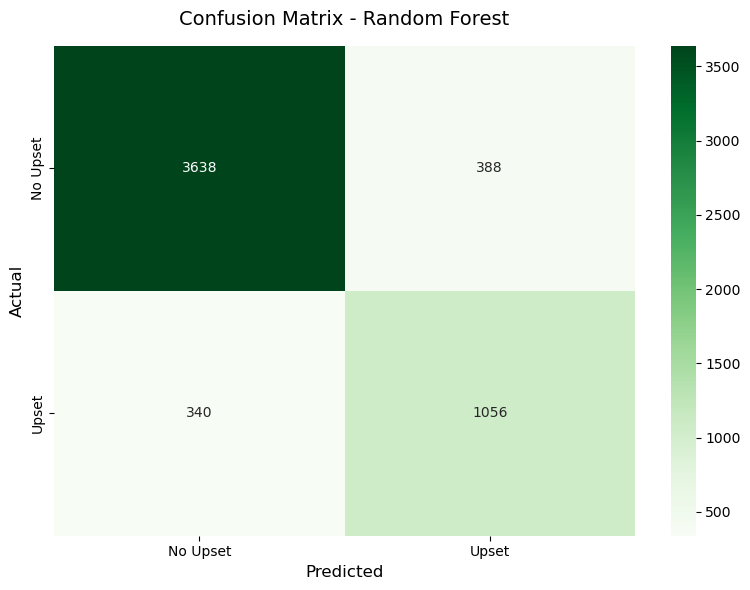

Confusion Matrix Breakdown:
True Negatives (TN): 3638
False Positives (FP): 388
False Negatives (FN): 340
True Positives (TP): 1056


In [46]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=True,
            xticklabels=['No Upset', 'Upset'],
            yticklabels=['No Upset', 'Upset'])
plt.title('Confusion Matrix - Random Forest', fontsize=14, pad=15)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("Confusion Matrix Breakdown:")
print(f"True Negatives (TN): {cm_rf[0,0]}")
print(f"False Positives (FP): {cm_rf[0,1]}")
print(f"False Negatives (FN): {cm_rf[1,0]}")
print(f"True Positives (TP): {cm_rf[1,1]}")

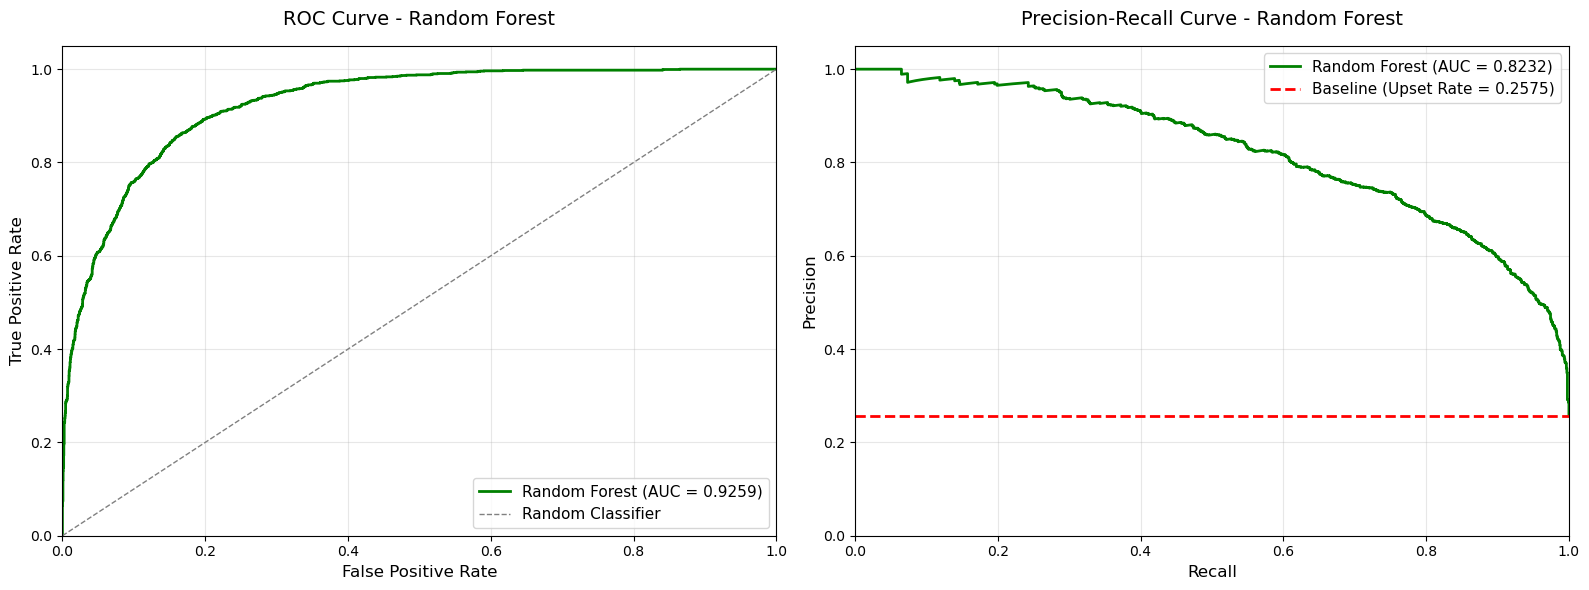

In [47]:
# ROC and Precision-Recall Curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
precision_rf, recall_pr_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
pr_auc_rf = auc(recall_pr_rf, precision_rf)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ROC Curve
axes[0].plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
axes[0].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate', fontsize=12)
axes[0].set_ylabel('True Positive Rate', fontsize=12)
axes[0].set_title('ROC Curve - Random Forest', fontsize=14, pad=15)
axes[0].legend(loc="lower right", fontsize=11)
axes[0].grid(alpha=0.3)

# Precision-Recall Curve
axes[1].plot(recall_pr_rf, precision_rf, color='green', lw=2, label=f'Random Forest (AUC = {pr_auc_rf:.4f})')
axes[1].axhline(y=y_test.mean(), color='red', linestyle='--', lw=2, 
                label=f'Baseline (Upset Rate = {y_test.mean():.4f})')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Recall', fontsize=12)
axes[1].set_ylabel('Precision', fontsize=12)
axes[1].set_title('Precision-Recall Curve - Random Forest', fontsize=14, pad=15)
axes[1].legend(loc="best", fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


Top 20 Most Important Features (Random Forest):
                 Feature  Importance
      experience_gap_pct    0.128918
          form_diff_365d    0.094183
           activity_diff    0.081594
          experience_gap    0.067684
    career_win_rate_diff    0.050643
  winner_career_win_rate    0.043283
             winner_seed    0.042948
          form_diff_180d    0.037255
winner_total_matches_90d    0.027515
    winner_hard_win_rate    0.027403
              loser_seed    0.023332
   winner_career_matches    0.023185
       surface_advantage    0.022433
    winner_win_ratio_90d    0.017659
    loser_career_matches    0.016978
    winner_clay_win_rate    0.013374
 loser_total_matches_90d    0.013189
   loser_career_win_rate    0.011612
           form_diff_90d    0.011026
              winner_age    0.010056


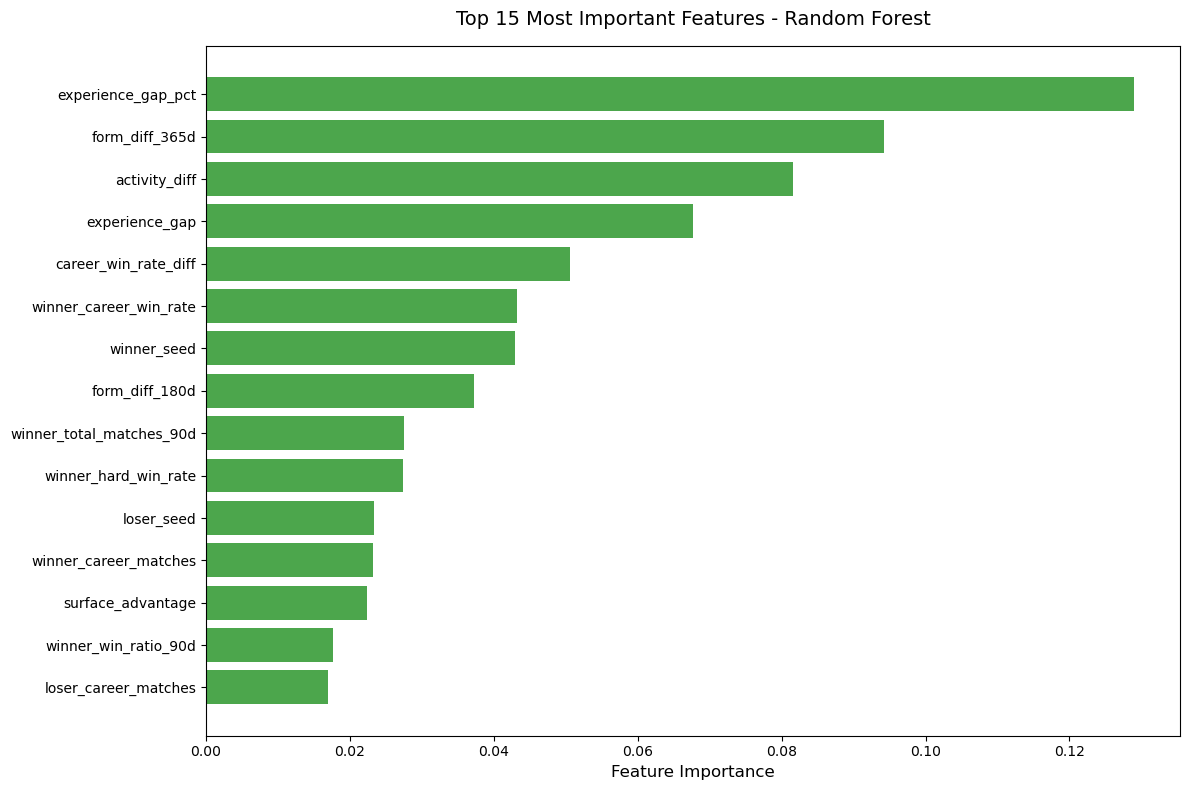

In [48]:
# Feature Importance
feature_importance_rf = pd.DataFrame({
    'Feature': feature_cols_clean,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 20 Most Important Features (Random Forest):")
print("="*80)
print(feature_importance_rf.head(20).to_string(index=False))

# Visualize top features
plt.figure(figsize=(12, 8))
top_features_rf = feature_importance_rf.head(15)
plt.barh(range(len(top_features_rf)), top_features_rf['Importance'], color='green', alpha=0.7)
plt.yticks(range(len(top_features_rf)), top_features_rf['Feature'])
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 15 Most Important Features - Random Forest', fontsize=14, pad=15)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 12. XGBoost Classifier

Now let's train an XGBoost model with the clean dataset.

In [49]:
import xgboost as xgb

# Calculate scale_pos_weight for class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Train XGBoost model
print("Training XGBoost Classifier...")
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_model.fit(X_train_clean, y_train)

print("XGBoost training completed!")
print(f"Number of boosting rounds: {xgb_model.n_estimators}")
print(f"Number of features used: {xgb_model.n_features_in_}")

Training XGBoost Classifier...
XGBoost training completed!
Number of boosting rounds: 100
Number of features used: 64


In [50]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test_clean)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_clean)[:, 1]

# Calculate metrics
f1_xgb = f1_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print("\n" + "="*80)
print("XGBOOST - MODEL PERFORMANCE")
print("="*80)
print(f"\nF1-Score: {f1_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"ROC-AUC: {roc_auc_xgb:.4f}")
print("\n" + "="*80)
print("\nDetailed Classification Report:")
print("="*80)
print(classification_report(y_test, y_pred_xgb, target_names=['No Upset', 'Upset']))


XGBOOST - MODEL PERFORMANCE

F1-Score: 0.7719
Recall: 0.8496
ROC-AUC: 0.9449


Detailed Classification Report:
              precision    recall  f1-score   support

    No Upset       0.94      0.88      0.91      4026
       Upset       0.71      0.85      0.77      1396

    accuracy                           0.87      5422
   macro avg       0.83      0.86      0.84      5422
weighted avg       0.88      0.87      0.87      5422



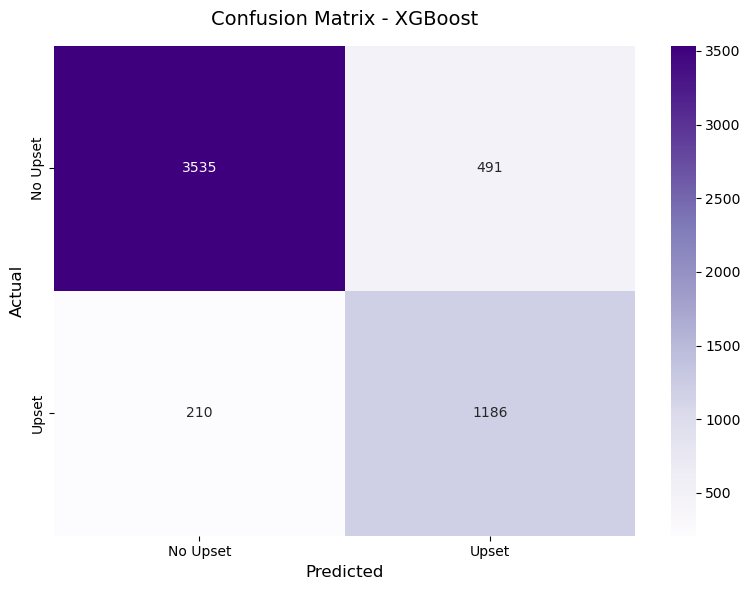

Confusion Matrix Breakdown:
True Negatives (TN): 3535
False Positives (FP): 491
False Negatives (FN): 210
True Positives (TP): 1186


In [51]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples', cbar=True,
            xticklabels=['No Upset', 'Upset'],
            yticklabels=['No Upset', 'Upset'])
plt.title('Confusion Matrix - XGBoost', fontsize=14, pad=15)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("Confusion Matrix Breakdown:")
print(f"True Negatives (TN): {cm_xgb[0,0]}")
print(f"False Positives (FP): {cm_xgb[0,1]}")
print(f"False Negatives (FN): {cm_xgb[1,0]}")
print(f"True Positives (TP): {cm_xgb[1,1]}")

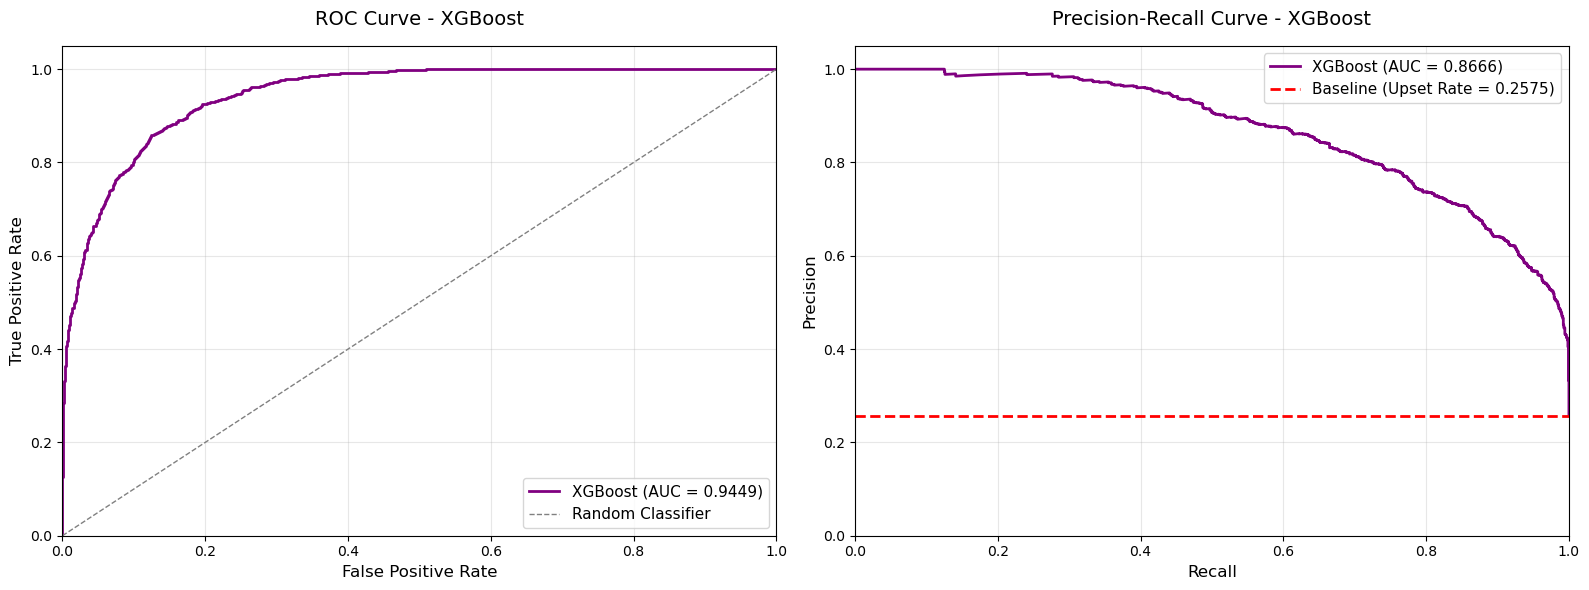

In [52]:
# ROC and Precision-Recall Curves
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
precision_xgb, recall_pr_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)
pr_auc_xgb = auc(recall_pr_xgb, precision_xgb)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ROC Curve
axes[0].plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')
axes[0].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate', fontsize=12)
axes[0].set_ylabel('True Positive Rate', fontsize=12)
axes[0].set_title('ROC Curve - XGBoost', fontsize=14, pad=15)
axes[0].legend(loc="lower right", fontsize=11)
axes[0].grid(alpha=0.3)

# Precision-Recall Curve
axes[1].plot(recall_pr_xgb, precision_xgb, color='purple', lw=2, label=f'XGBoost (AUC = {pr_auc_xgb:.4f})')
axes[1].axhline(y=y_test.mean(), color='red', linestyle='--', lw=2, 
                label=f'Baseline (Upset Rate = {y_test.mean():.4f})')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Recall', fontsize=12)
axes[1].set_ylabel('Precision', fontsize=12)
axes[1].set_title('Precision-Recall Curve - XGBoost', fontsize=14, pad=15)
axes[1].legend(loc="best", fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


Top 20 Most Important Features (XGBoost):
                    Feature  Importance
         experience_gap_pct    0.155332
             experience_gap    0.111393
             form_diff_365d    0.084232
                winner_seed    0.060039
              activity_diff    0.043186
   winner_total_matches_90d    0.030488
                 loser_seed    0.029287
    loser_total_matches_90d    0.019496
      winner_career_matches    0.018063
       career_win_rate_diff    0.017243
       winner_form_momentum    0.014706
        loser_win_ratio_90d    0.013752
h2h_last_meeting_winner_won    0.013679
     winner_career_win_rate    0.013498
       winner_hard_win_rate    0.011942
       loser_career_matches    0.010675
      winner_grass_win_rate    0.010530
       winner_win_ratio_90d    0.010409
                 winner_age    0.010308
      loser_career_win_rate    0.010210


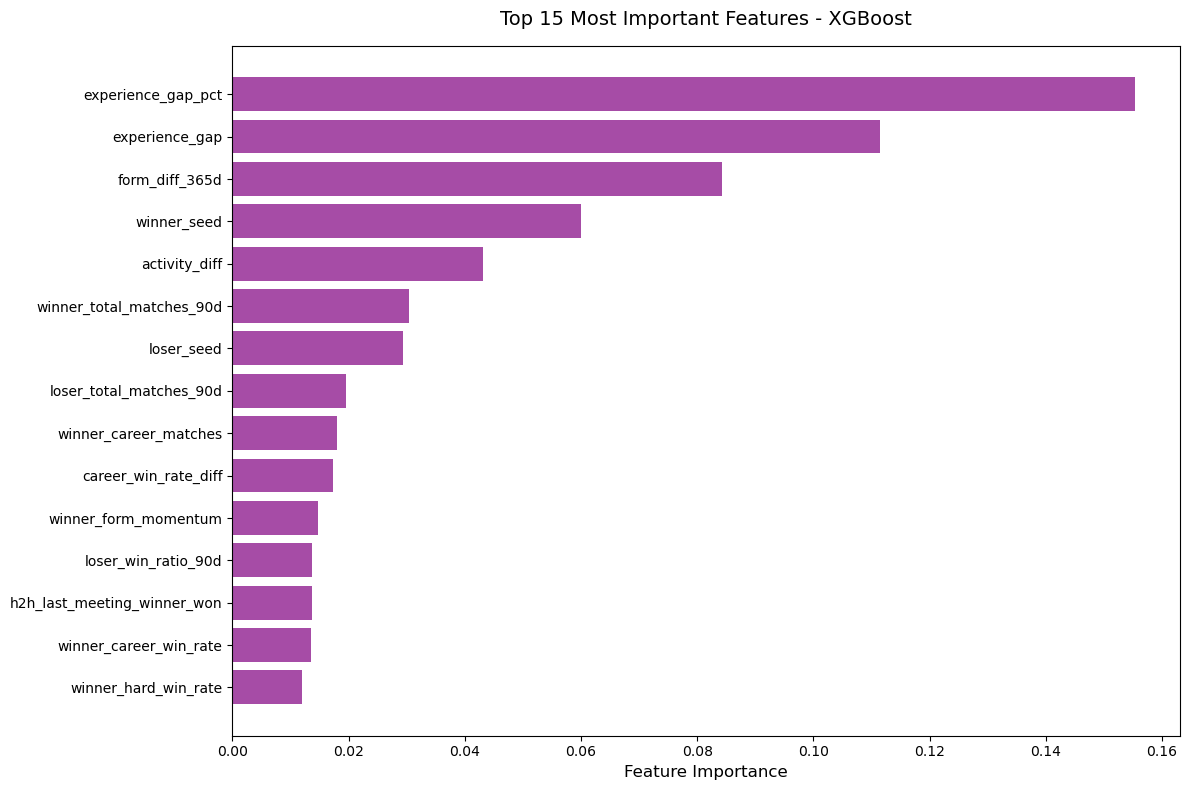

In [53]:
# Feature Importance
feature_importance_xgb = pd.DataFrame({
    'Feature': feature_cols_clean,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 20 Most Important Features (XGBoost):")
print("="*80)
print(feature_importance_xgb.head(20).to_string(index=False))

# Visualize top features
plt.figure(figsize=(12, 8))
top_features_xgb = feature_importance_xgb.head(15)
plt.barh(range(len(top_features_xgb)), top_features_xgb['Importance'], color='purple', alpha=0.7)
plt.yticks(range(len(top_features_xgb)), top_features_xgb['Feature'])
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 15 Most Important Features - XGBoost', fontsize=14, pad=15)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 13. Model Comparison

Let's compare all three classification models side by side.

In [54]:
# Create comprehensive comparison table
from sklearn.metrics import accuracy_score, precision_score

# Calculate additional metrics for all models
models_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'F1-Score': [f1_clean, f1_rf, f1_xgb],
    'Recall': [recall_clean, recall_rf, recall_xgb],
    'Precision': [
        precision_score(y_test, y_pred_clean),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_clean),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'ROC-AUC': [roc_auc_clean, roc_auc_rf, roc_auc_xgb],
    'PR-AUC': [pr_auc_clean, pr_auc_rf, pr_auc_xgb]
})

print("\n" + "="*100)
print("COMPREHENSIVE MODEL COMPARISON - TENNIS UPSET PREDICTION")
print("="*100)
print(models_comparison.to_string(index=False))
print("="*100)

# Highlight best model for each metric
print("\n🏆 BEST PERFORMING MODEL PER METRIC:")
print("-" * 100)
for col in ['F1-Score', 'Recall', 'Precision', 'Accuracy', 'ROC-AUC', 'PR-AUC']:
    best_idx = models_comparison[col].idxmax()
    best_model = models_comparison.loc[best_idx, 'Model']
    best_value = models_comparison.loc[best_idx, col]
    print(f"{col:15s}: {best_model:25s} ({best_value:.4f})")


COMPREHENSIVE MODEL COMPARISON - TENNIS UPSET PREDICTION
              Model  F1-Score   Recall  Precision  Accuracy  ROC-AUC   PR-AUC
Logistic Regression  0.700182 0.828080   0.606506  0.817411 0.911422 0.786964
      Random Forest  0.743662 0.756447   0.731302  0.865732 0.925928 0.823226
            XGBoost  0.771884 0.849570   0.707215  0.870712 0.944914 0.866632

🏆 BEST PERFORMING MODEL PER METRIC:
----------------------------------------------------------------------------------------------------
F1-Score       : XGBoost                   (0.7719)
Recall         : XGBoost                   (0.8496)
Precision      : Random Forest             (0.7313)
Accuracy       : XGBoost                   (0.8707)
ROC-AUC        : XGBoost                   (0.9449)
PR-AUC         : XGBoost                   (0.8666)


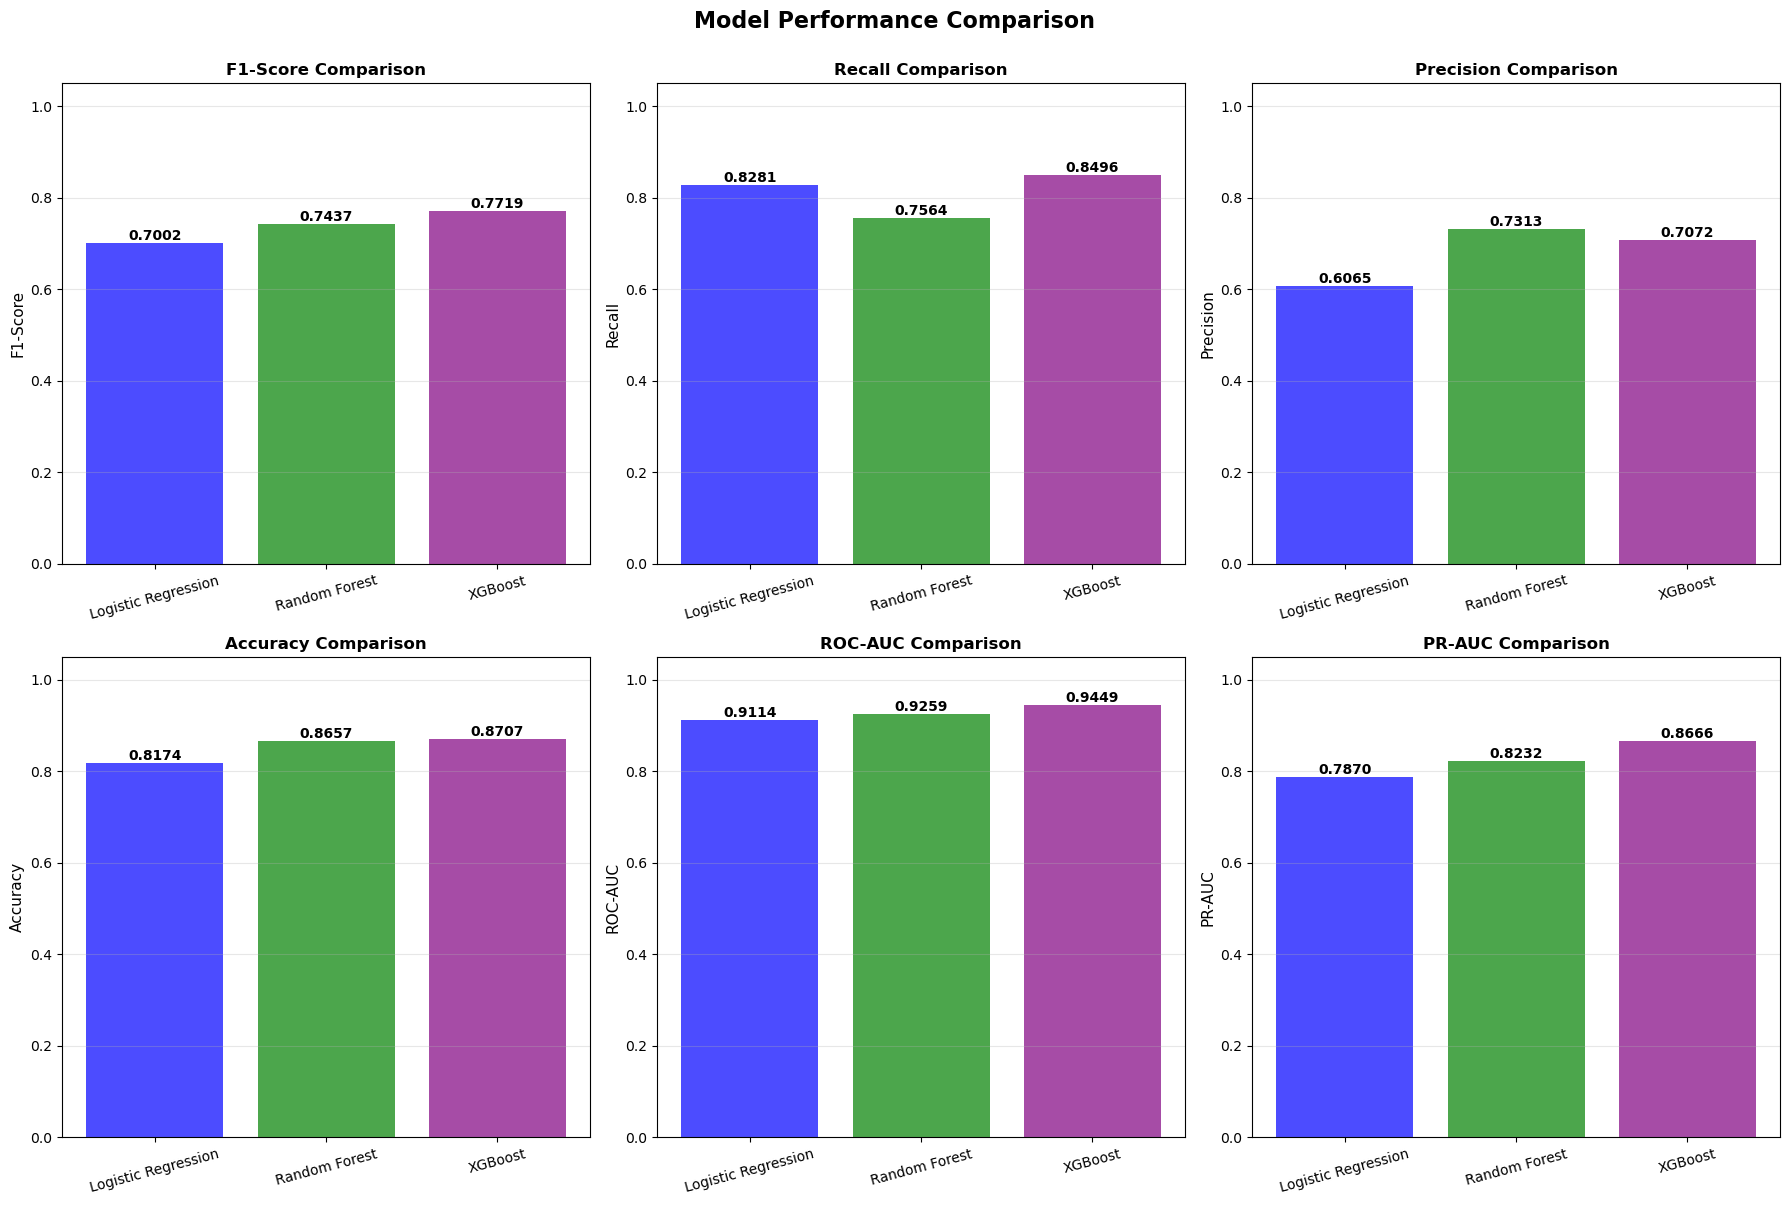

In [55]:
# Visualize model comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

metrics = ['F1-Score', 'Recall', 'Precision', 'Accuracy', 'ROC-AUC', 'PR-AUC']
colors = ['blue', 'green', 'purple']

for idx, metric in enumerate(metrics):
    row = idx // 3
    col = idx % 3
    
    values = models_comparison[metric].values
    bars = axes[row, col].bar(models_comparison['Model'], values, color=colors, alpha=0.7)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.4f}',
                           ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    axes[row, col].set_ylabel(metric, fontsize=11)
    axes[row, col].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    axes[row, col].set_ylim([0, 1.05])
    axes[row, col].grid(axis='y', alpha=0.3)
    axes[row, col].tick_params(axis='x', rotation=15)

plt.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

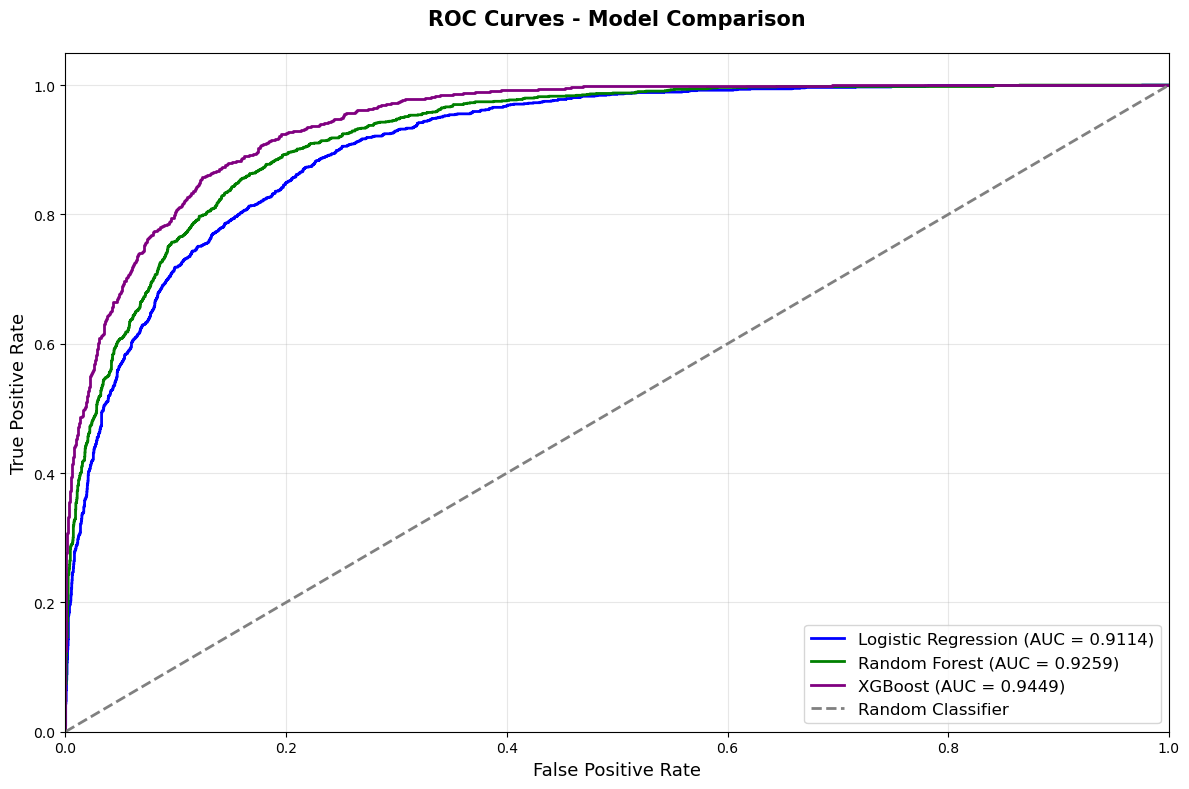

In [56]:
# Compare ROC curves on same plot
plt.figure(figsize=(12, 8))
plt.plot(fpr_clean, tpr_clean, color='blue', lw=2, 
         label=f'Logistic Regression (AUC = {roc_auc_clean:.4f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, 
         label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, 
         label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC Curves - Model Comparison', fontsize=15, fontweight='bold', pad=20)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

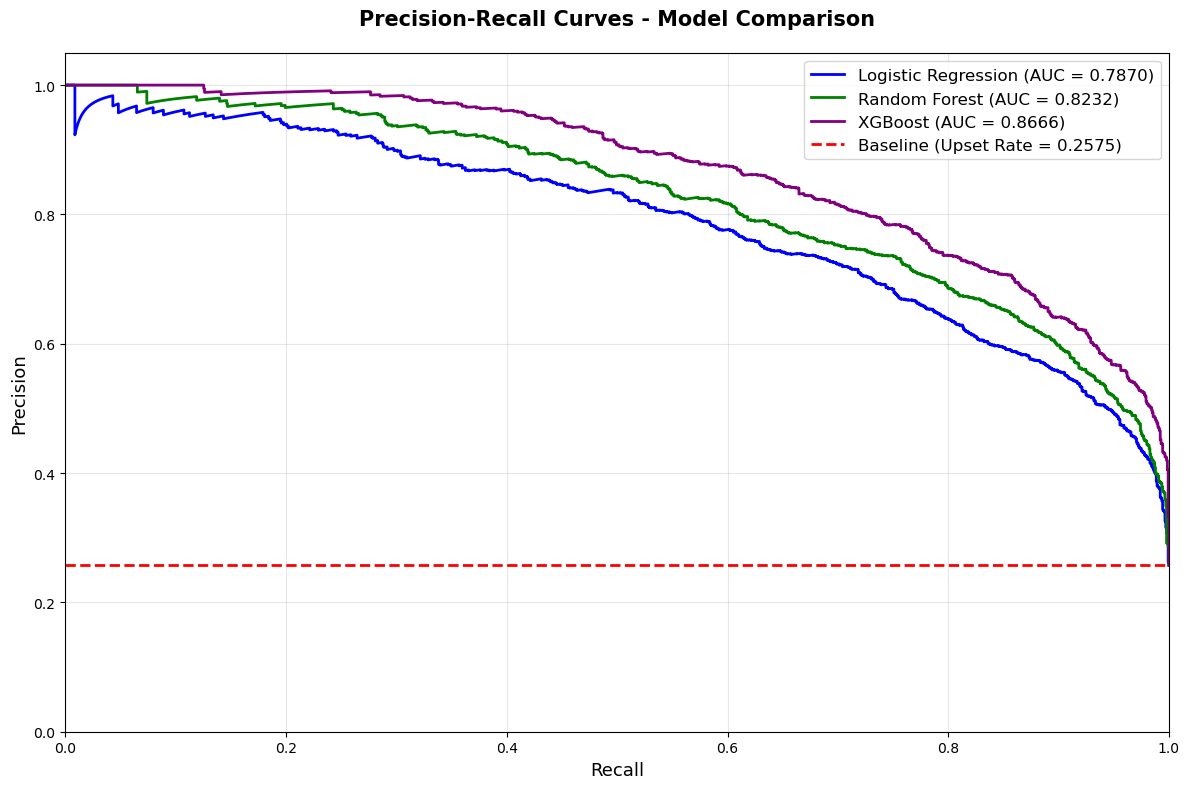

In [57]:
# Compare Precision-Recall curves on same plot
plt.figure(figsize=(12, 8))
plt.plot(recall_pr_clean, precision_clean, color='blue', lw=2, 
         label=f'Logistic Regression (AUC = {pr_auc_clean:.4f})')
plt.plot(recall_pr_rf, precision_rf, color='green', lw=2, 
         label=f'Random Forest (AUC = {pr_auc_rf:.4f})')
plt.plot(recall_pr_xgb, precision_xgb, color='purple', lw=2, 
         label=f'XGBoost (AUC = {pr_auc_xgb:.4f})')
plt.axhline(y=y_test.mean(), color='red', linestyle='--', lw=2, 
            label=f'Baseline (Upset Rate = {y_test.mean():.4f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=13)
plt.ylabel('Precision', fontsize=13)
plt.title('Precision-Recall Curves - Model Comparison', fontsize=15, fontweight='bold', pad=20)
plt.legend(loc="best", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [58]:
# Save final results
models_comparison.to_csv('all_models_comparison.csv', index=False)
print("\n💾 All model results saved to: all_models_comparison.csv")

# Print final summary
print("\n" + "="*100)
print("FINAL SUMMARY - TENNIS UPSET PREDICTION")
print("="*100)
print(f"\n📊 Dataset Information:")
print(f"   • Training samples: {len(X_train_clean)} (years 2016-2022)")
print(f"   • Test samples: {len(X_test_clean)} (years 2023-2024)")
print(f"   • Features: {len(feature_cols_clean)} (after removing data leakage)")
print(f"   • Class distribution (test): {(y_test==0).sum()} no upsets, {(y_test==1).sum()} upsets ({y_test.mean():.2%} upset rate)")

print(f"\n🎯 Recommendation:")
best_f1_idx = models_comparison['F1-Score'].idxmax()
best_model = models_comparison.loc[best_f1_idx, 'Model']
print(f"   Based on F1-Score (primary metric), {best_model} performs best")
print(f"   with an F1-Score of {models_comparison.loc[best_f1_idx, 'F1-Score']:.4f}")

print("\n" + "="*100)


💾 All model results saved to: all_models_comparison.csv

FINAL SUMMARY - TENNIS UPSET PREDICTION

📊 Dataset Information:
   • Training samples: 16104 (years 2016-2022)
   • Test samples: 5422 (years 2023-2024)
   • Features: 64 (after removing data leakage)
   • Class distribution (test): 4026 no upsets, 1396 upsets (25.75% upset rate)

🎯 Recommendation:
   Based on F1-Score (primary metric), XGBoost performs best
   with an F1-Score of 0.7719

